<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2951-3000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [531]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [532]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

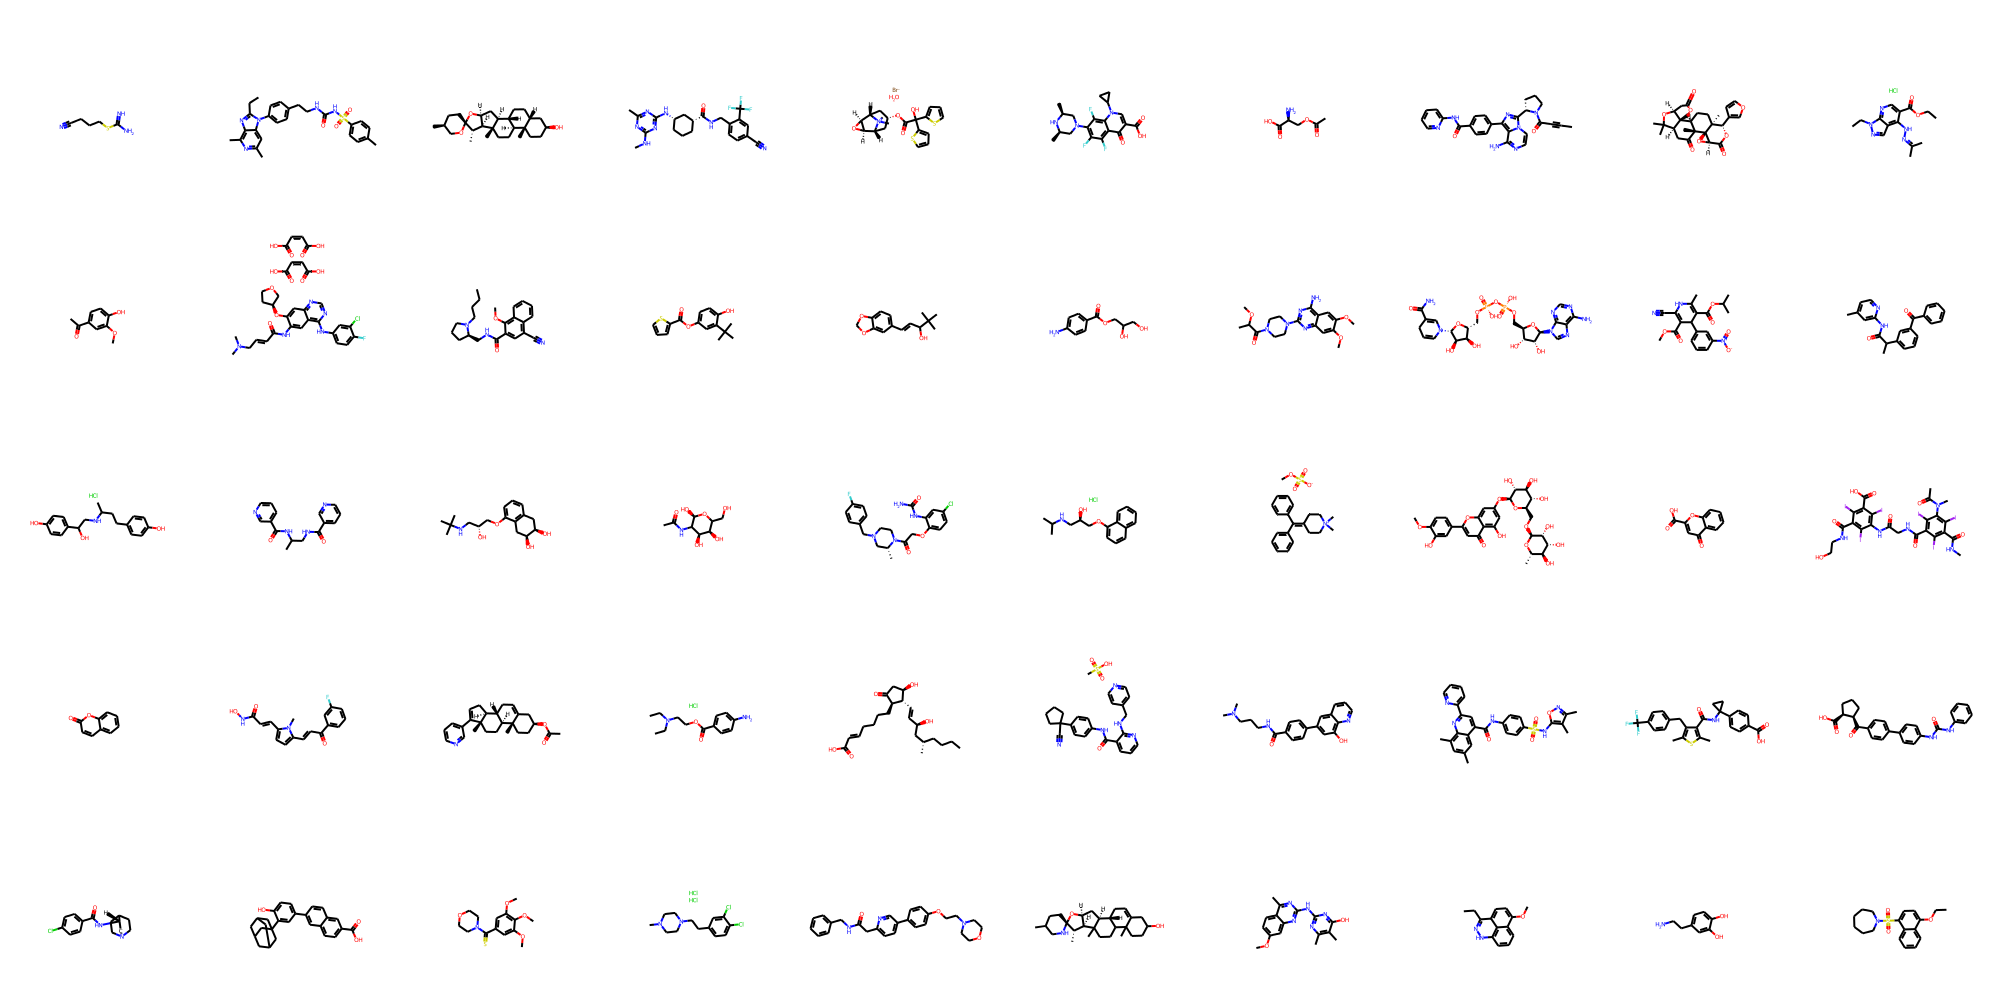

In [533]:
smiles_list = [

'N#CCCCSC(=N)N',
'CCc1nc2c(C)nc(C)cc2n1-c1ccc(CCNC(=O)NS(=O)(=O)c2ccc(C)cc2)cc1',
'C[C@H]1CC[C@@]2(OC1)O[C@H]1C[C@H]3[C@@H]4CC[C@@H]5C[C@@H](O)CC[C@]5(C)[C@H]4CC[C@]3(C)[C@H]1[C@@H]2C',
'CNc1nc(C)nc(N[C@H]2CCC[C@@H](C(=O)NCc3ccc(C#N)cc3C(F)(F)F)C2)n1',
'C[N+]1(C)[C@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cccs3)C[C@@H]1[C@H]1O[C@@H]21.O.[Br-]',
'C[C@H]1CN(c2c(F)c(F)c3c(=O)c(C(=O)O)cn(C4CC4)c3c2F)C[C@@H](C)N1',
'CC(=O)OC[C@H](N)C(=O)O',
'CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2)c2c(N)nccn12',
'CC1(C)O[C@H]2CC(=O)OC[C@@]23[C@H]1CC(=O)[C@]1(C)[C@@H]3CC[C@@]2(C)[C@H](c3ccoc3)OC(=O)[C@H]3O[C@]321',
'CCOC(=O)c1cnc2c(cnn2CC)c1NN=C(C)C.Cl',
'COc1cc(C(C)=O)ccc1O',
'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1.O=C(O)/C=C\C(=O)O.O=C(O)/C=C\C(=O)O',
'CCCCN1CCC[C@@H]1CNC(=O)c1cc(C#N)c2ccccc2c1OC',
'CC(C)(C)c1cc(OC(=O)c2cccs2)ccc1O',
'CC(C)(C)C(O)/C=C/c1ccc2c(c1)OCO2',
'Nc1ccc(C(=O)OCC(O)CO)cc1',
'COc1cc2nc(N3CCN(C(=O)C(C)OC)CC3)nc(N)c2cc1OC',
'NC(=O)C1=CN([C@@H]2O[C@H](CO[P@](=O)(O)O[P@@](=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1',
'COC(=O)C1=C(C#N)NC(C)=C(C(=O)OC(C)C)C1c1cccc([N+](=O)[O-])c1',
'Cc1ccnc(NC(=O)C(C)c2cccc(C(=O)c3ccccc3)c2)c1',
'CC(CCc1ccc(O)cc1)NCC(O)c1ccc(O)cc1.Cl',
'CC(CNC(=O)c1cccnc1)NC(=O)c1cccnc1',
'CC(C)(C)NC[C@@H](O)COc1cccc2c1C[C@H](O)[C@H](O)C2',
'CC(=O)NC1[C@@H](O)OC(CO)[C@@H](O)[C@H]1O',
'C[C@@H]1CN(Cc2ccc(F)cc2)CCN1C(=O)COc1ccc(Cl)cc1NC(N)=O',
'CC(C)NC[C@@H](O)COc1cccc2ccccc12.Cl',
'COS(=O)(=O)[O-].C[N+]1(C)CCC(=C(c2ccccc2)c2ccccc2)CC1',
'COc1ccc(-c2cc(=O)c3c(O)cc(O[C@@H]4O[C@H](CO[C@@H]5O[C@@H](C)[C@H](O)[C@@H](O)[C@H]5O)[C@@H](O)[C@H](O)[C@H]4O)cc3o2)cc1O',
'O=C(O)c1cc(=O)c2ccccc2o1',
'CNC(=O)c1c(I)c(C(=O)NCC(=O)Nc2c(I)c(C(=O)O)c(I)c(C(=O)NCCO)c2I)c(I)c(N(C)C(C)=O)c1I',
'O=c1ccc2ccccc2o1',
'Cn1c(/C=C/C(=O)NO)ccc1/C=C/C(=O)c1cccc(F)c1',
'CC(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@H]4CC=C(c5cccnc5)[C@@]4(C)CC[C@@H]32)C1',
'CCN(CC)CCOC(=O)c1ccc(N)cc1.Cl',
'CCCC[C@H](C)C[C@H](O)/C=C/[C@H]1[C@H](O)CC(=O)[C@@H]1CCCC/C=C/C(=O)O',
'CS(=O)(=O)O.N#CC1(c2ccc(NC(=O)c3cccnc3NCc3ccncc3)cc2)CCCC1',
'CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1',
'Cc1cc(C)c2nc(-c3ccccn3)cc(C(=O)Nc3ccc(S(=O)(=O)Nc4onc(C)c4C)cc3)c2c1',
'Cc1sc(C)c(C(=O)NC2(c3ccc(C(=O)O)cc3)CC2)c1Cc1ccc(C(F)(F)F)cc1',
'O=C(Nc1ccccc1)Nc1ccc(-c2ccc(C(=O)[C@@H]3CCC[C@@H]3C(=O)O)cc2)cc1',
'O=C(N[C@H]1CN2CCC1CC2)c1ccc(Cl)cc1',
'O=C(O)c1ccc2cc(-c3ccc(O)c(C45CC6CC(CC(C6)C4)C5)c3)ccc2c1',
'COc1cc(C(=S)N2CCOCC2)cc(OC)c1OC',
'CN1CCN(CCc2ccc(Cl)c(Cl)c2)CC1.Cl.Cl',
'O=C(Cc1ccc(-c2ccc(OCCN3CCOCC3)cc2)cn1)NCc1ccccc1',
'CC1CC[C@@]2(NC1)O[C@H]1C[C@H]3[C@@H]4CC=C5CC(O)CCC5(C)C4CCC3(C)[C@H]1[C@@H]2C',
'COc1ccc2c(C)nc(Nc3nc(C)c(C)c(O)n3)nc2c1',
'CCC1=NNc2cccc3c(OC)ccc1c23',
'NCCc1ccc(O)c(O)c1',
'CCOc1ccc(S(=O)(=O)N2CCCCCC2)c2ccccc12',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



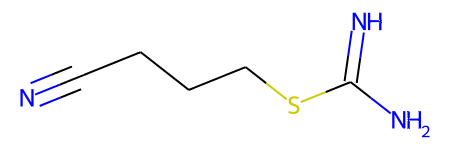

In [534]:
M1 = mol_list [0]
M1

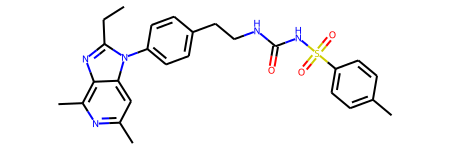

In [535]:
M2 = mol_list [1]
M2

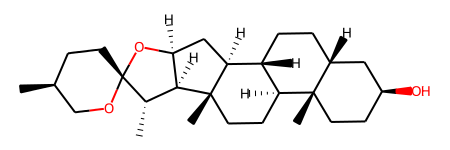

In [536]:
M3 = mol_list [2]
M3

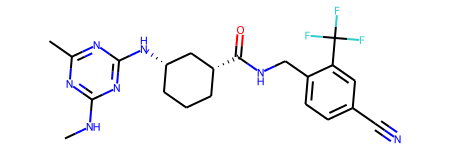

In [537]:
M4 = mol_list [3]
M4

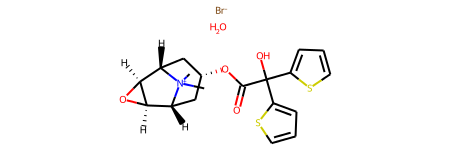

In [538]:
M5 = mol_list [4]
M5

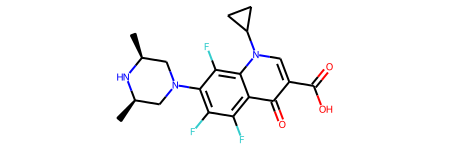

In [539]:
M6 = mol_list [5]
M6

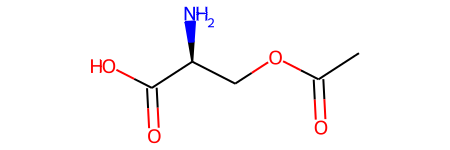

In [540]:
M7 = mol_list [6]
M7

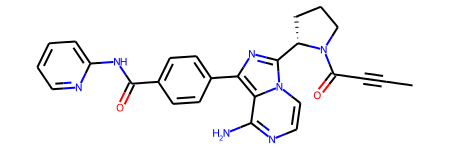

In [541]:
M8 = mol_list [7]
M8

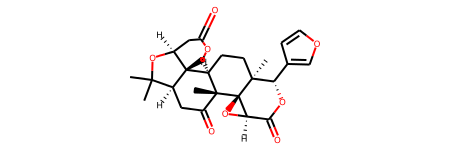

In [542]:
M9 = mol_list [8]
M9

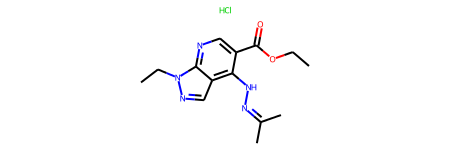

In [543]:
M10 = mol_list [9]
M10

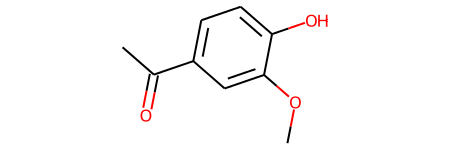

In [544]:
M11 = mol_list [10]
M11

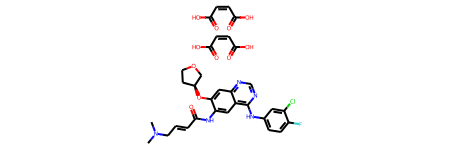

In [545]:
M12 = mol_list [11]
M12

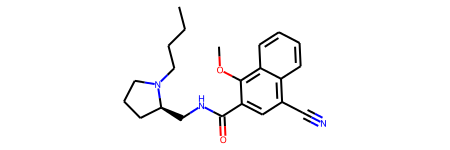

In [546]:
M13 = mol_list [12]
M13

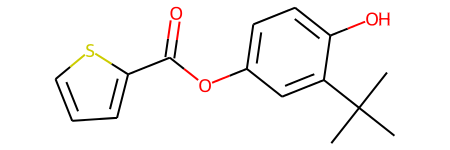

In [547]:
M14 = mol_list [13]
M14

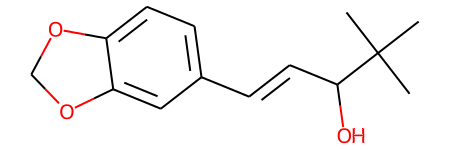

In [548]:
M15 = mol_list [14]
M15

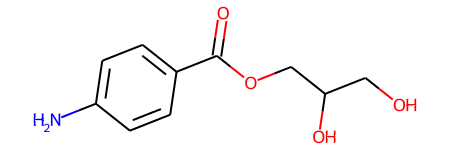

In [549]:
M16 = mol_list [15]
M16

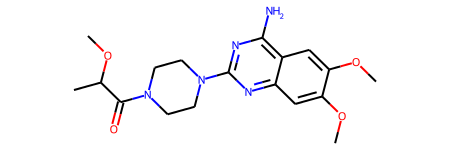

In [550]:
M17 = mol_list [16]
M17

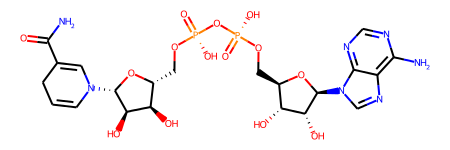

In [551]:
M18 = mol_list [17]
M18

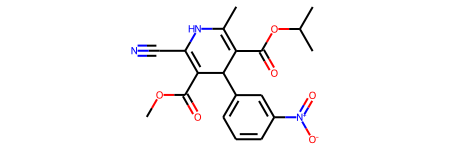

In [552]:
M19 = mol_list [18]
M19

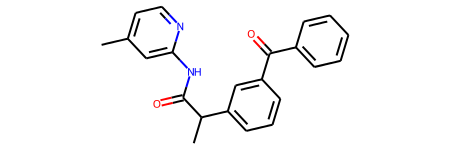

In [553]:
M20 = mol_list [19]
M20

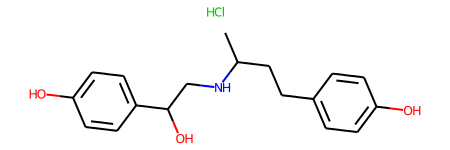

In [554]:
M21 = mol_list [20]
M21

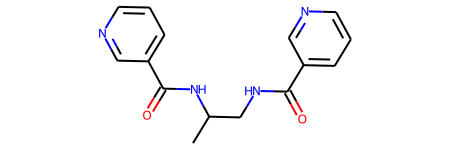

In [555]:
M22 = mol_list [21]
M22

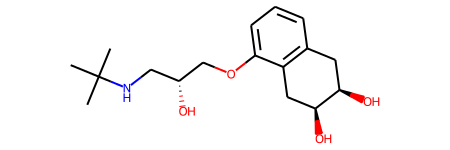

In [556]:
M23 = mol_list [22]
M23

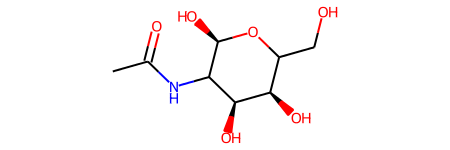

In [557]:
M24 = mol_list [23]
M24

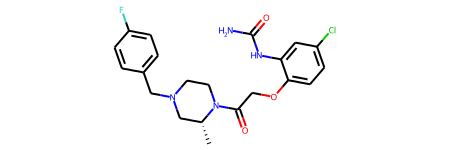

In [558]:
M25 = mol_list [24]
M25

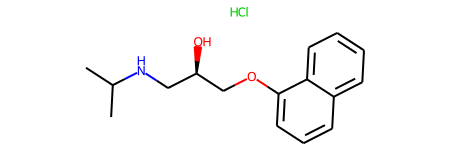

In [559]:
M26 = mol_list [25]
M26

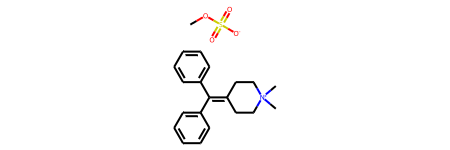

In [560]:
M27 = mol_list [26]
M27

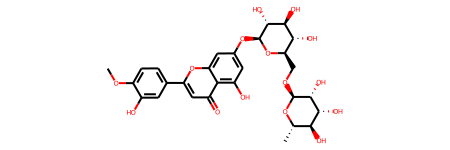

In [561]:
M28 = mol_list [27]
M28

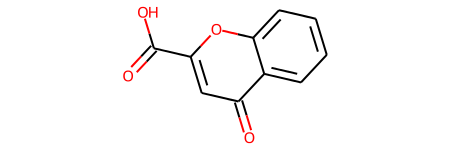

In [562]:
M29 = mol_list [28]
M29

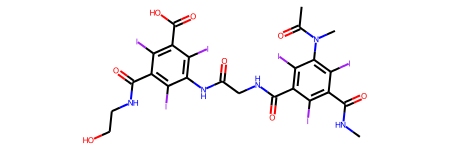

In [563]:
M30 = mol_list [29]
M30

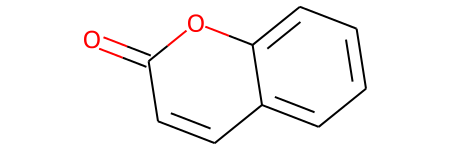

In [564]:
M31 = mol_list [30]
M31

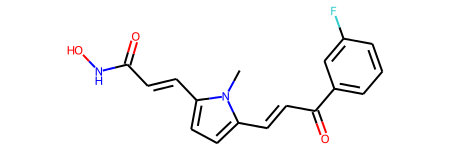

In [565]:
M32 = mol_list [31]
M32

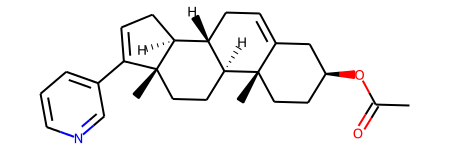

In [566]:
M33 = mol_list [32]
M33

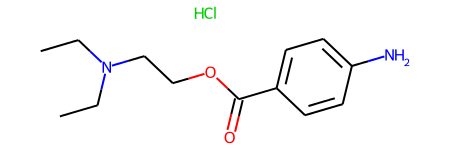

In [567]:
M34 = mol_list [33]
M34

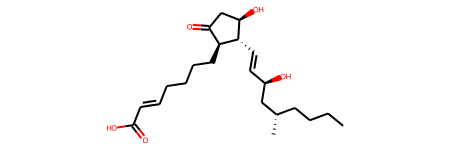

In [568]:
M35 = mol_list [34]
M35

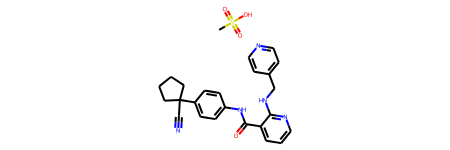

In [569]:
M36 = mol_list [35]
M36

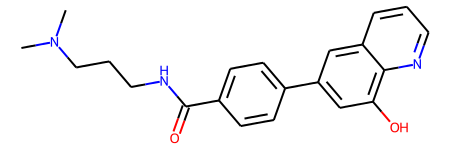

In [570]:
M37= mol_list [36]
M37

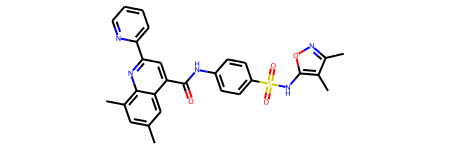

In [571]:
M38= mol_list [37]
M38

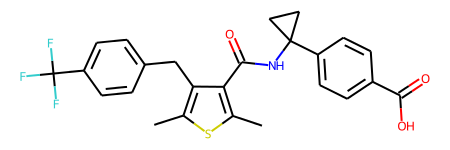

In [572]:
M39= mol_list [38]
M39

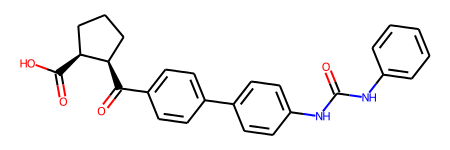

In [573]:
M40= mol_list [39]
M40

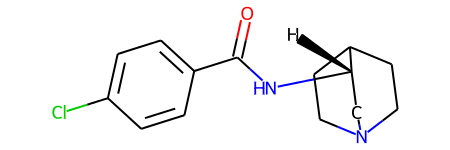

In [574]:
M41= mol_list [40]
M41

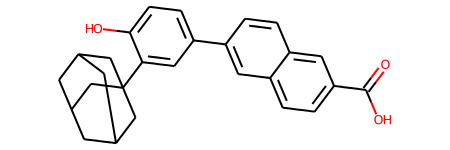

In [575]:
M42= mol_list [41]
M42

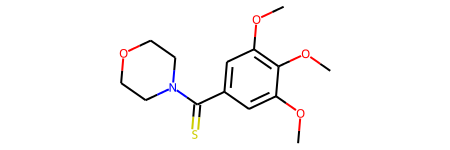

In [576]:
M43= mol_list [42]
M43

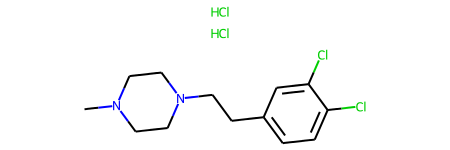

In [577]:
M44= mol_list [43]
M44

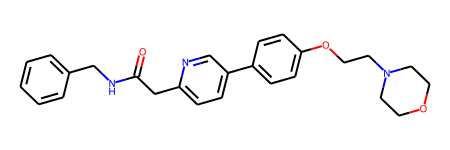

In [578]:
M45= mol_list [44]
M45

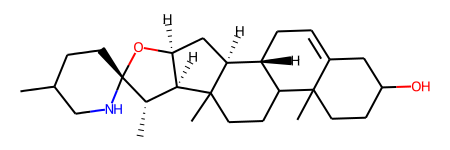

In [579]:
M46= mol_list [45]
M46

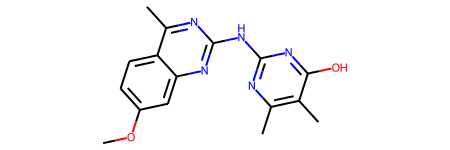

In [580]:
M47= mol_list [46]
M47

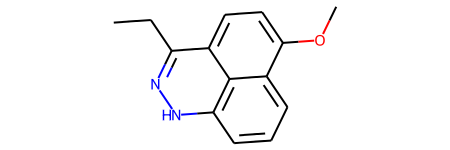

In [581]:
M48= mol_list [47]
M48

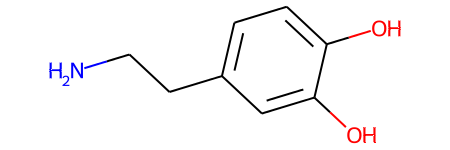

In [582]:
M49= mol_list [48]
M49

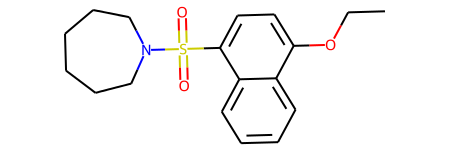

In [583]:
M50= mol_list [49]
M50

In [584]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 65,
 80,
 106,
 116,
 140,
 144,
 147,
 158,
 244,
 353,
 360,
 413,
 623,
 653,
 674,
 790,
 802,
 807,
 887,
 942]

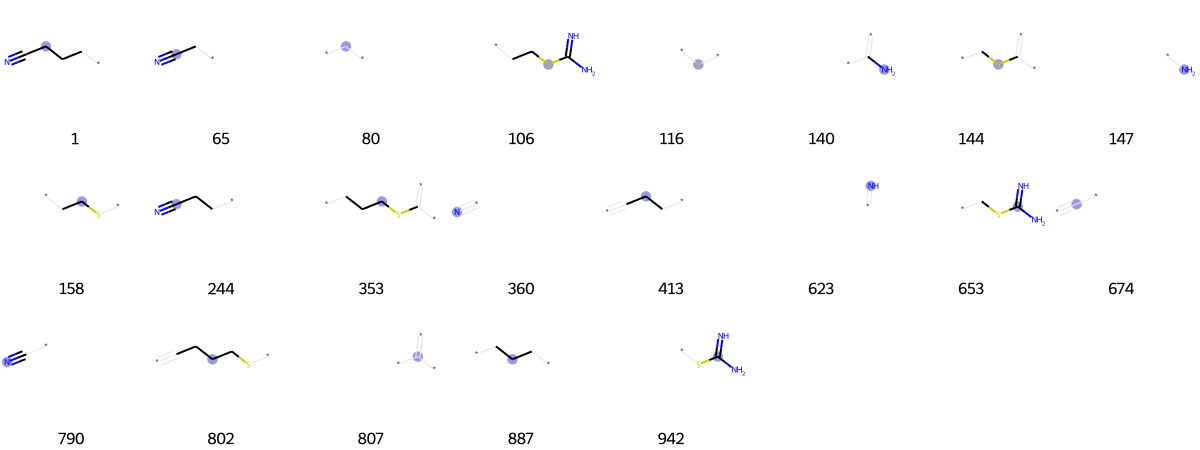

In [585]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [586]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[21,
 33,
 45,
 58,
 80,
 92,
 128,
 197,
 219,
 233,
 235,
 294,
 307,
 310,
 318,
 319,
 331,
 350,
 355,
 356,
 378,
 425,
 441,
 452,
 454,
 483,
 496,
 502,
 528,
 532,
 582,
 650,
 667,
 698,
 700,
 707,
 715,
 726,
 730,
 742,
 757,
 775,
 799,
 801,
 807,
 828,
 831,
 849,
 875,
 883,
 893,
 896,
 919,
 935,
 965,
 969,
 974]

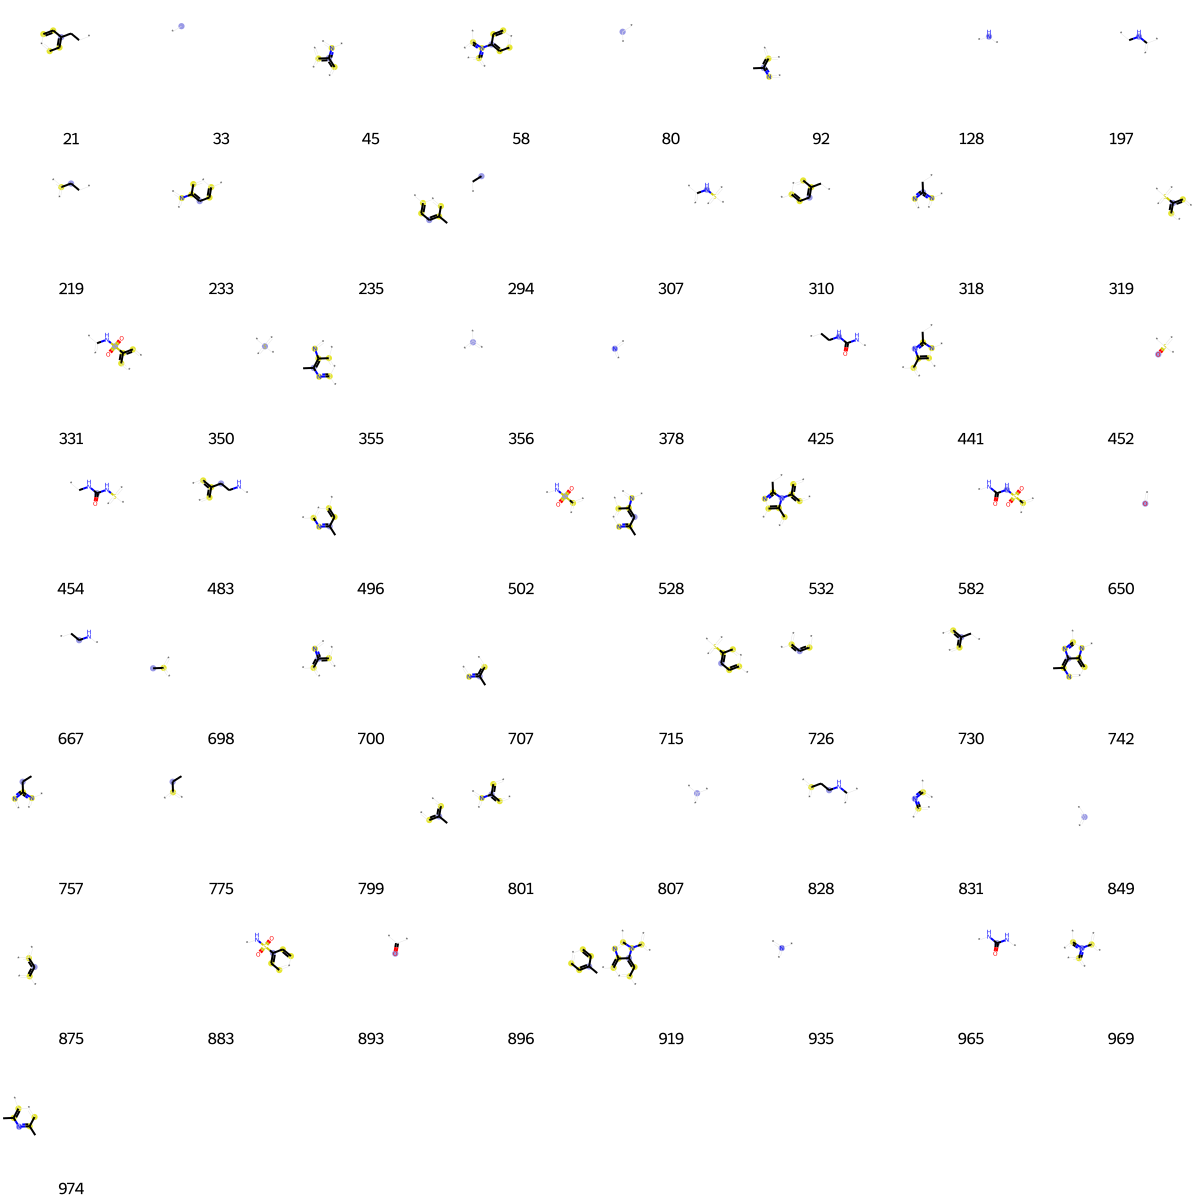

In [587]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [588]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[26,
 33,
 36,
 46,
 71,
 105,
 124,
 138,
 144,
 186,
 192,
 222,
 233,
 250,
 255,
 265,
 266,
 268,
 285,
 301,
 320,
 324,
 345,
 385,
 445,
 453,
 500,
 508,
 519,
 522,
 528,
 529,
 590,
 622,
 645,
 656,
 775,
 795,
 807,
 890,
 899,
 926,
 927,
 956,
 999,
 1009,
 1014,
 1017,
 1019]

In [589]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[4,
 24,
 33,
 39,
 68,
 77,
 80,
 93,
 97,
 102,
 112,
 114,
 123,
 128,
 157,
 160,
 182,
 197,
 240,
 255,
 262,
 268,
 301,
 305,
 325,
 356,
 360,
 378,
 406,
 419,
 428,
 429,
 451,
 458,
 474,
 541,
 558,
 565,
 610,
 650,
 674,
 689,
 698,
 717,
 726,
 790,
 807,
 809,
 831,
 849,
 875,
 893,
 904,
 926,
 930,
 951,
 974,
 982,
 1019]

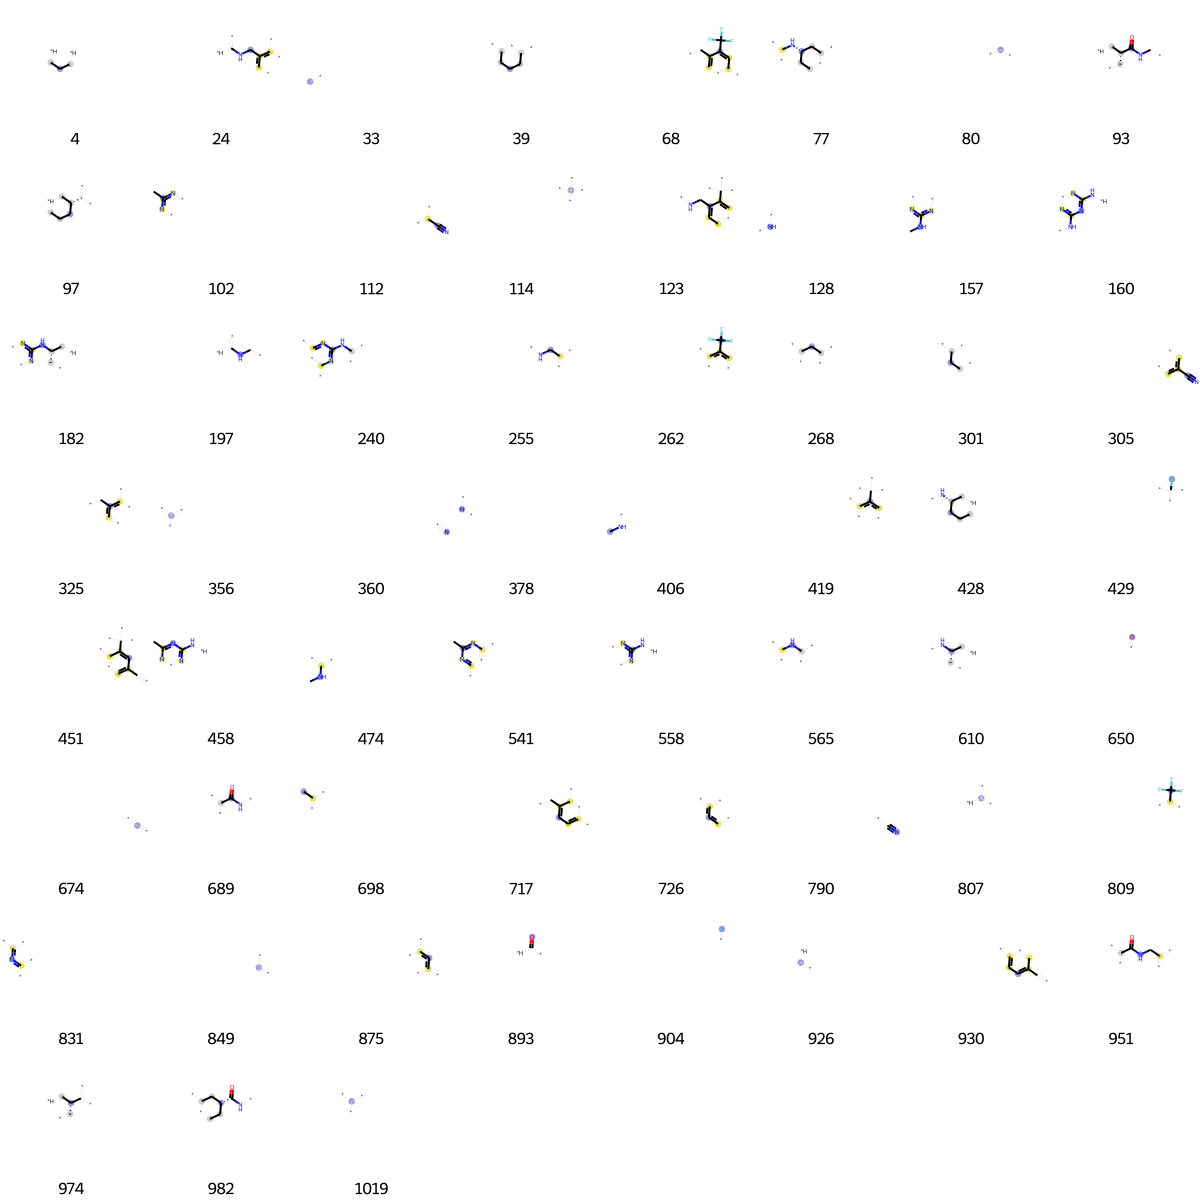

In [590]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [591]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[14,
 33,
 64,
 70,
 102,
 107,
 114,
 119,
 169,
 221,
 240,
 241,
 268,
 278,
 356,
 380,
 383,
 392,
 431,
 449,
 451,
 543,
 575,
 577,
 650,
 656,
 670,
 675,
 695,
 721,
 726,
 761,
 780,
 790,
 807,
 849,
 862,
 884,
 893,
 897,
 926,
 947,
 977,
 1019]

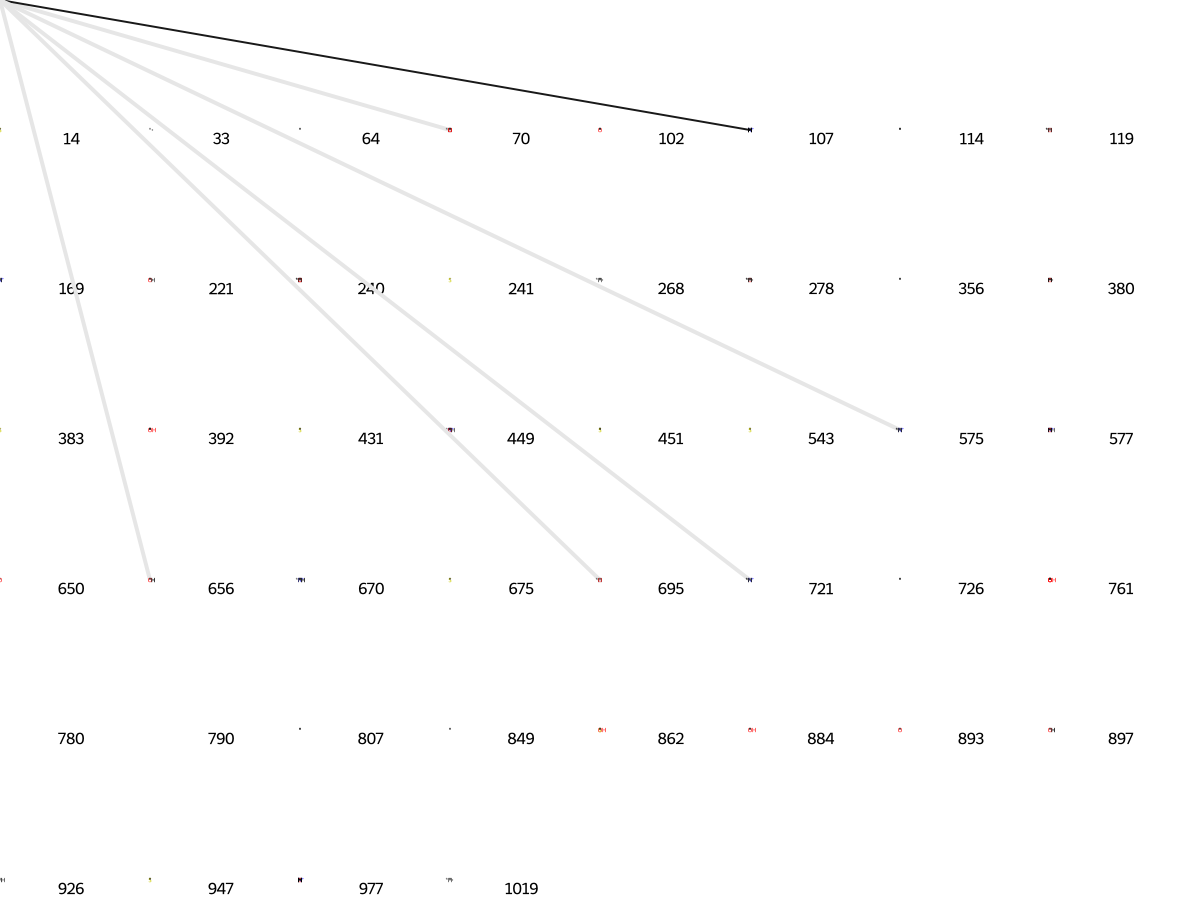

In [592]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [593]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[23,
 33,
 90,
 146,
 148,
 211,
 257,
 259,
 285,
 296,
 301,
 314,
 322,
 326,
 338,
 356,
 378,
 383,
 389,
 407,
 416,
 421,
 453,
 456,
 464,
 472,
 522,
 525,
 577,
 624,
 650,
 699,
 739,
 774,
 807,
 849,
 886,
 893,
 904,
 926,
 935,
 960,
 967,
 1019]

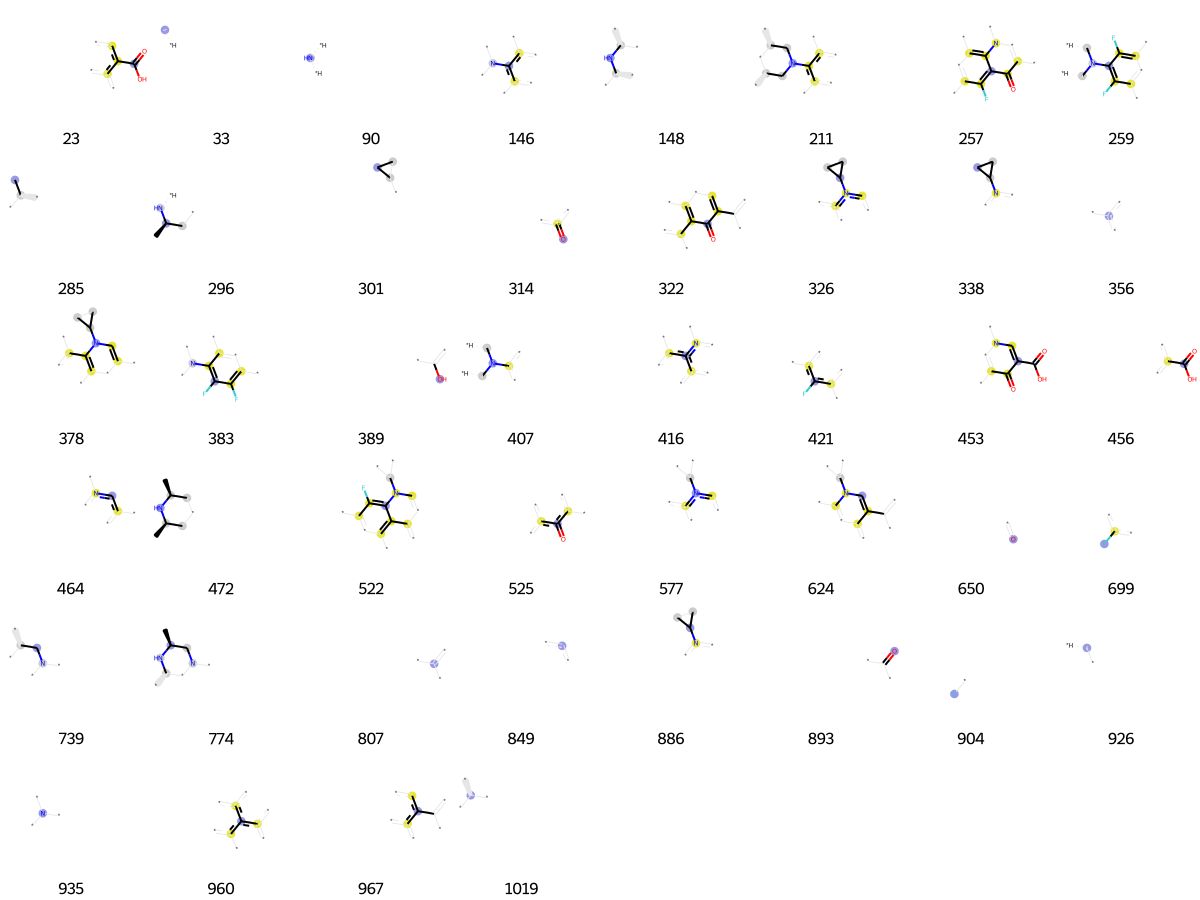

In [594]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [595]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 11,
 33,
 75,
 80,
 118,
 131,
 147,
 389,
 403,
 411,
 650,
 695,
 786,
 807,
 820,
 825,
 846,
 893,
 1017]

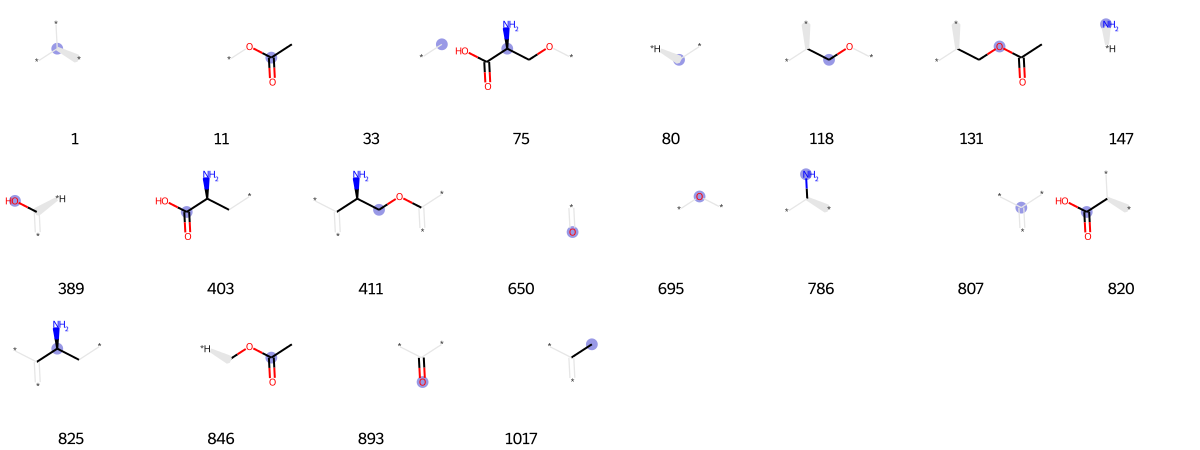

In [596]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [597]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[4,
 33,
 46,
 64,
 75,
 77,
 117,
 128,
 131,
 136,
 144,
 147,
 175,
 193,
 221,
 231,
 242,
 267,
 276,
 288,
 301,
 312,
 315,
 323,
 351,
 356,
 361,
 378,
 387,
 407,
 416,
 428,
 433,
 435,
 446,
 448,
 456,
 471,
 486,
 574,
 575,
 597,
 641,
 650,
 669,
 673,
 674,
 690,
 726,
 762,
 771,
 792,
 807,
 822,
 831,
 842,
 849,
 888,
 893,
 896,
 924,
 926,
 935,
 945,
 993,
 1019]

In [598]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[31,
 33,
 36,
 46,
 67,
 95,
 109,
 138,
 182,
 200,
 231,
 250,
 255,
 265,
 267,
 281,
 283,
 284,
 301,
 314,
 356,
 384,
 396,
 400,
 412,
 441,
 449,
 478,
 526,
 555,
 632,
 650,
 656,
 674,
 702,
 706,
 721,
 723,
 726,
 746,
 750,
 761,
 787,
 805,
 816,
 831,
 836,
 842,
 845,
 849,
 895,
 926,
 928,
 935,
 941,
 970,
 996,
 1006,
 1019]

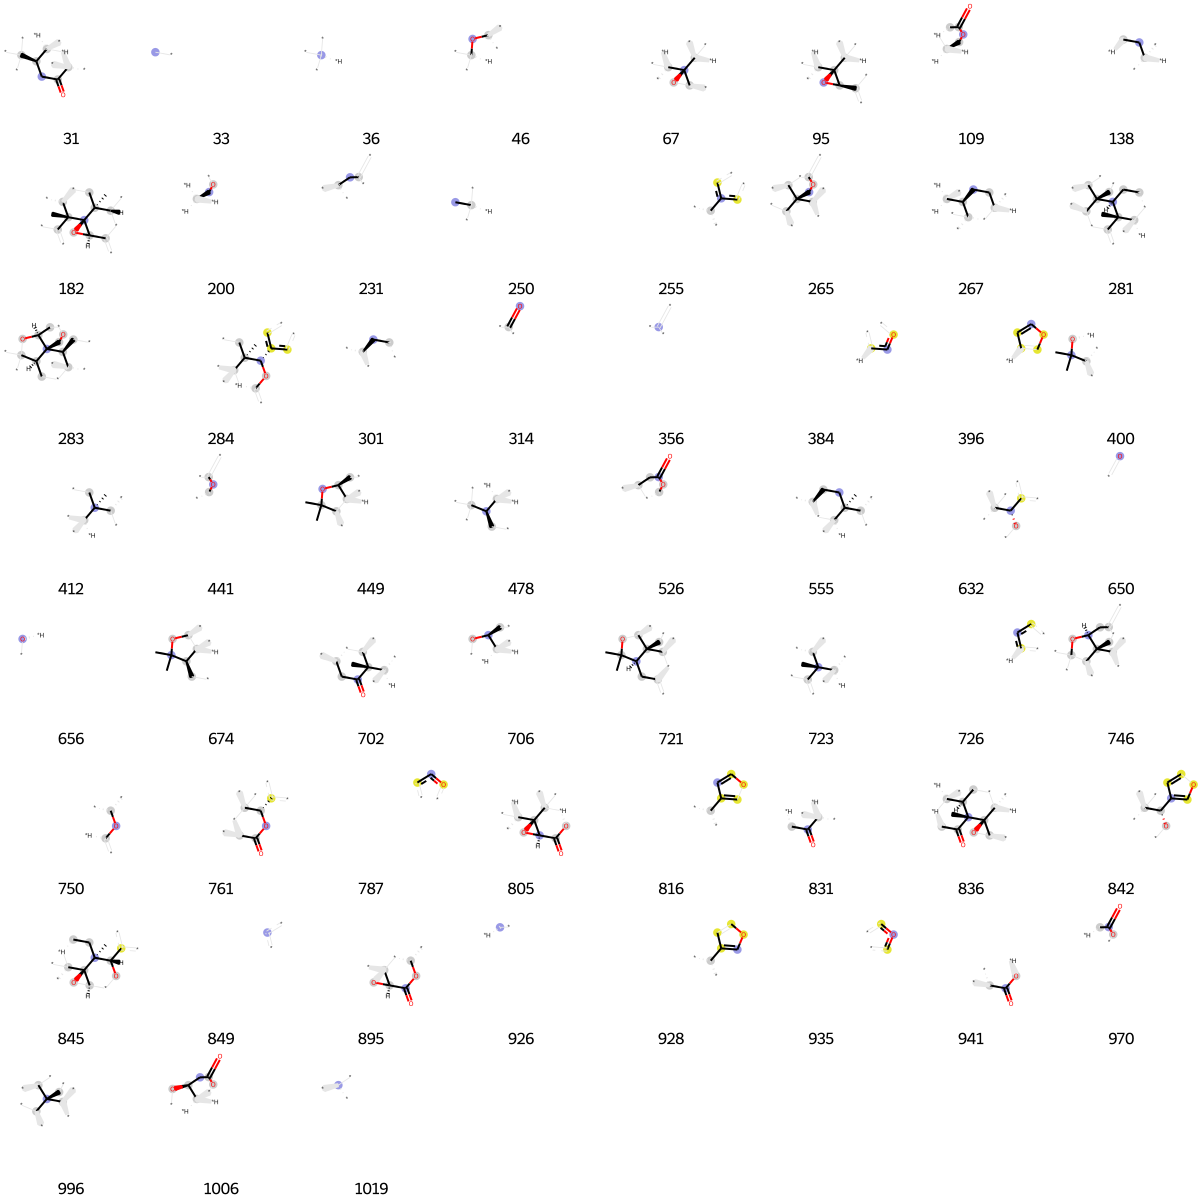

In [599]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [600]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 34,
 43,
 54,
 80,
 85,
 128,
 138,
 145,
 147,
 158,
 202,
 207,
 214,
 250,
 294,
 333,
 356,
 367,
 378,
 381,
 428,
 445,
 511,
 514,
 649,
 650,
 672,
 695,
 697,
 698,
 700,
 725,
 755,
 759,
 803,
 804,
 807,
 849,
 893,
 897,
 935,
 967,
 989,
 995,
 1017]

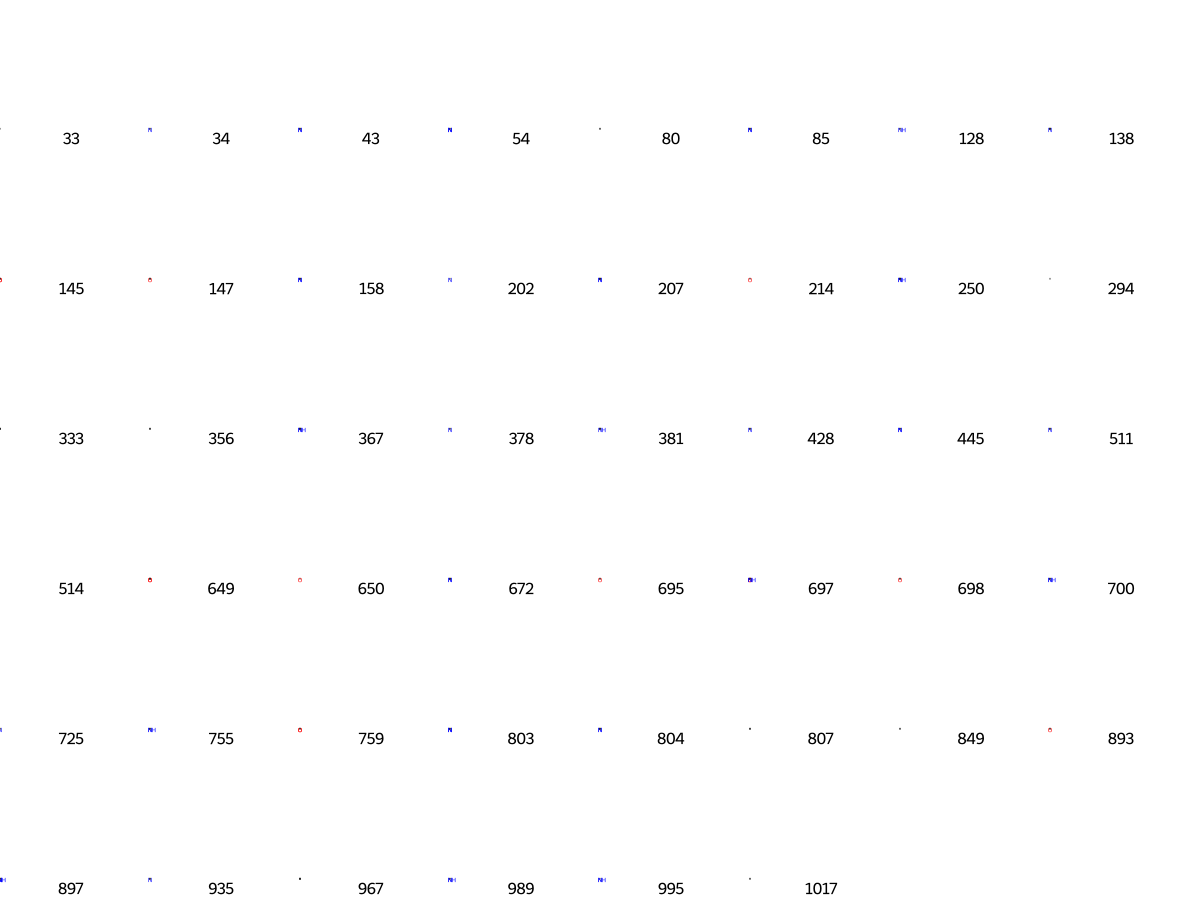

In [601]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [602]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[33,
 144,
 184,
 249,
 356,
 361,
 428,
 451,
 512,
 578,
 583,
 614,
 617,
 650,
 673,
 695,
 726,
 796,
 807,
 841,
 849,
 875,
 893,
 946,
 1017]

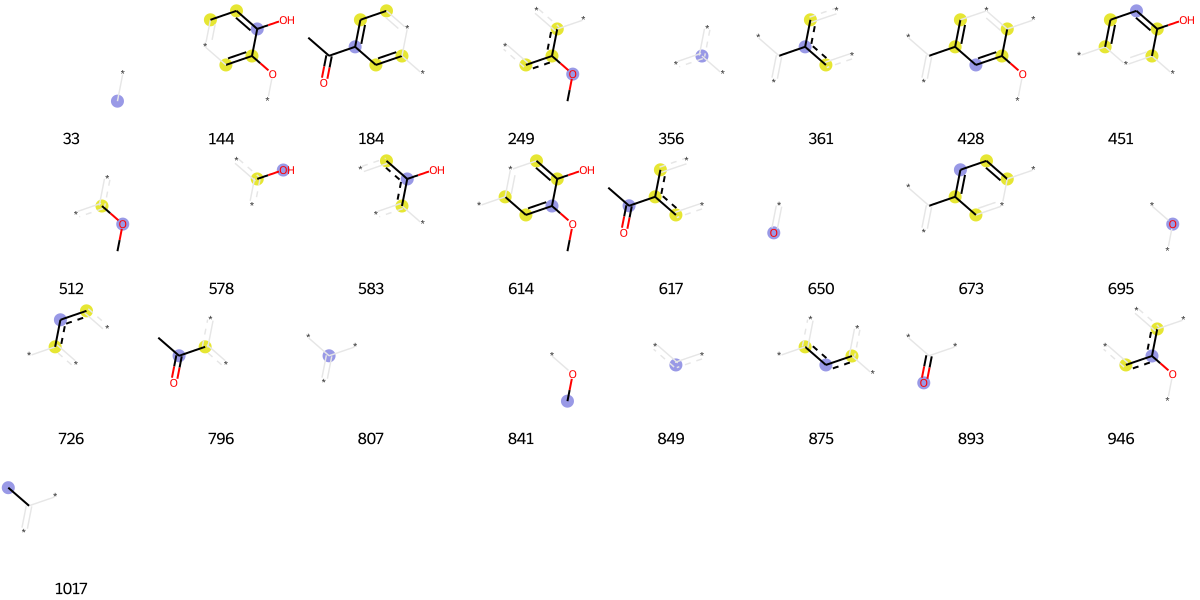

In [603]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [604]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[26,
 31,
 33,
 34,
 73,
 80,
 119,
 128,
 133,
 138,
 139,
 157,
 160,
 191,
 200,
 202,
 216,
 301,
 305,
 329,
 332,
 333,
 343,
 356,
 366,
 378,
 389,
 419,
 422,
 428,
 441,
 464,
 465,
 489,
 491,
 508,
 523,
 524,
 557,
 561,
 650,
 652,
 656,
 659,
 670,
 673,
 694,
 695,
 699,
 708,
 716,
 726,
 780,
 786,
 792,
 794,
 807,
 816,
 840,
 843,
 849,
 875,
 881,
 888,
 893,
 894,
 899,
 904,
 911,
 926,
 946,
 950,
 961,
 972,
 976,
 1006,
 1015,
 1019]

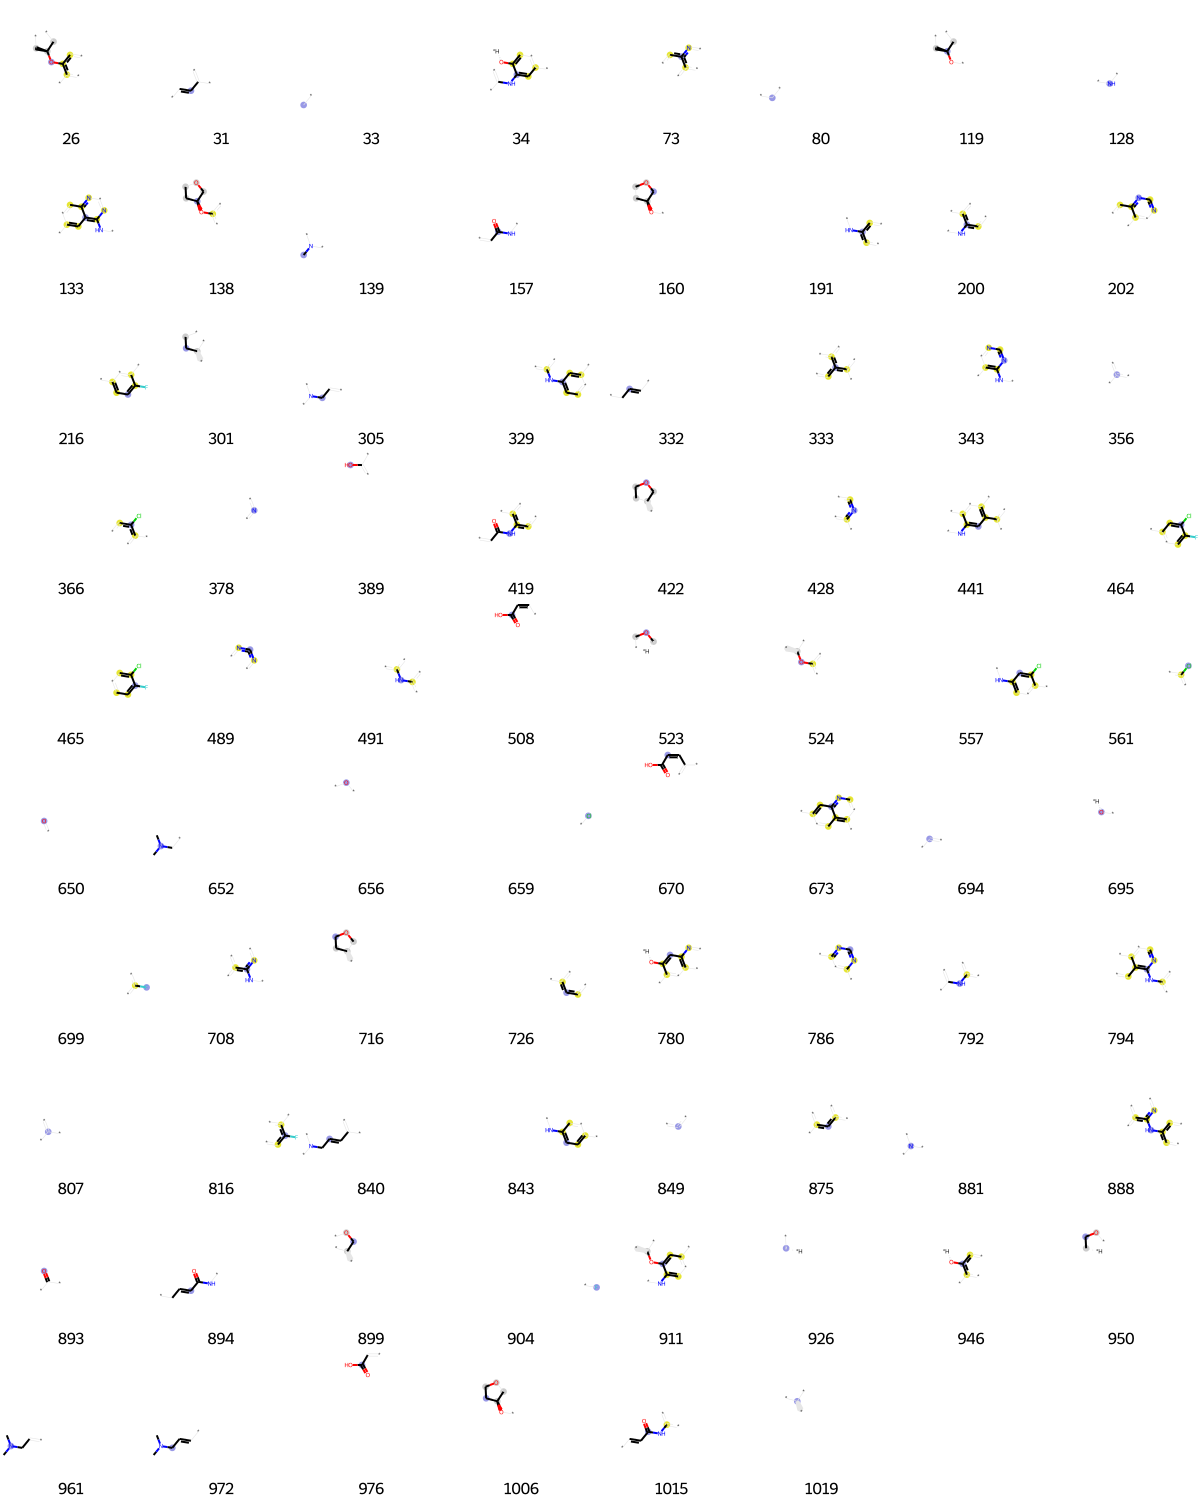

In [605]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [606]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[4,
 33,
 64,
 80,
 101,
 112,
 119,
 121,
 128,
 175,
 197,
 268,
 293,
 294,
 301,
 333,
 343,
 356,
 360,
 361,
 379,
 398,
 446,
 456,
 486,
 512,
 528,
 549,
 575,
 580,
 591,
 603,
 650,
 674,
 690,
 695,
 713,
 726,
 790,
 794,
 807,
 838,
 841,
 849,
 858,
 875,
 887,
 893,
 905,
 926,
 935,
 936,
 967,
 994,
 998,
 1019]

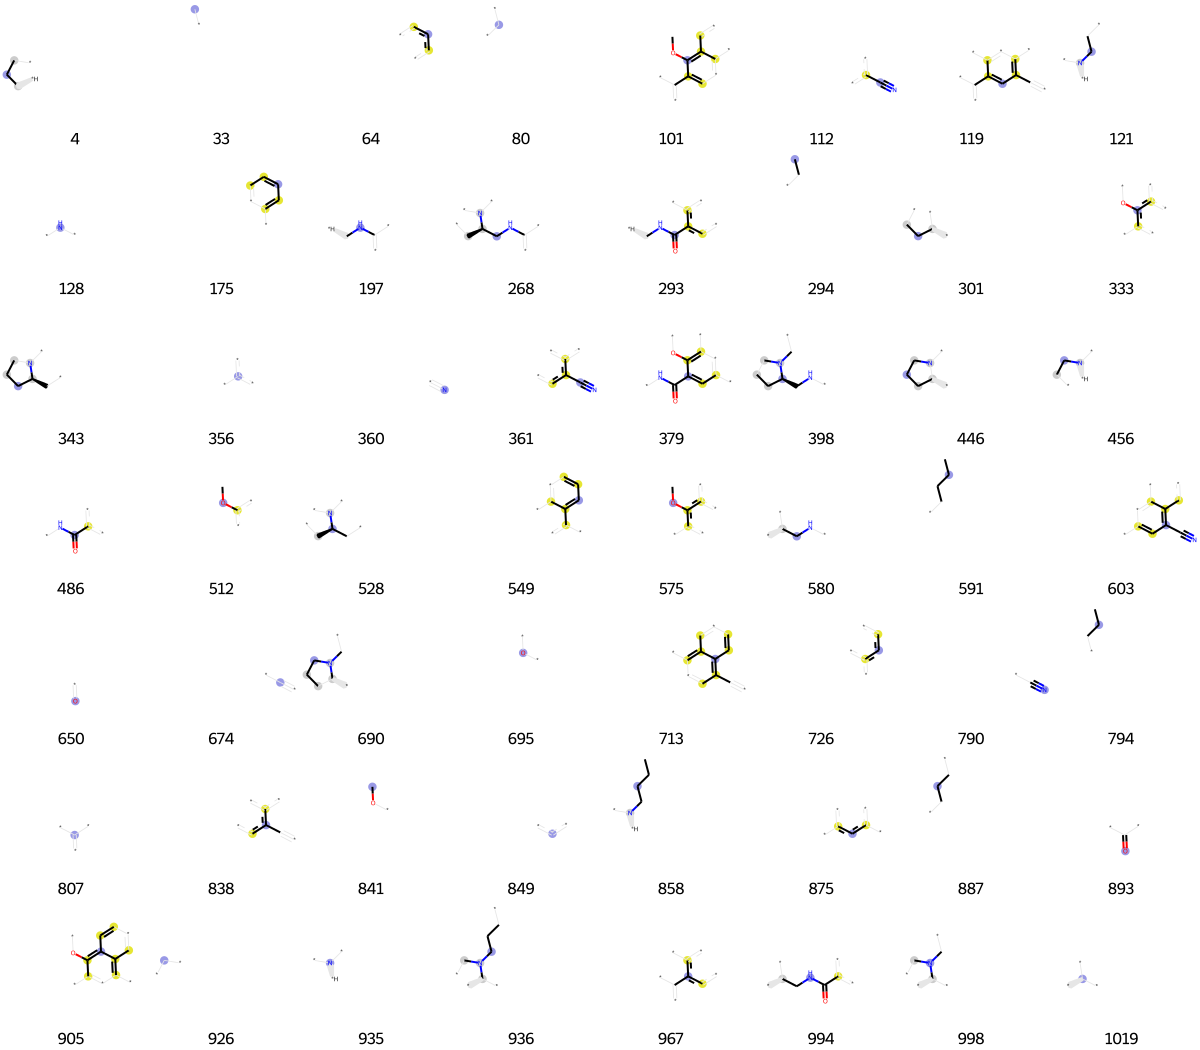

In [607]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [608]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[14,
 33,
 64,
 79,
 114,
 145,
 230,
 241,
 295,
 315,
 322,
 356,
 383,
 391,
 392,
 419,
 451,
 543,
 555,
 578,
 583,
 597,
 650,
 675,
 695,
 705,
 718,
 726,
 751,
 789,
 807,
 849,
 866,
 875,
 893,
 915]

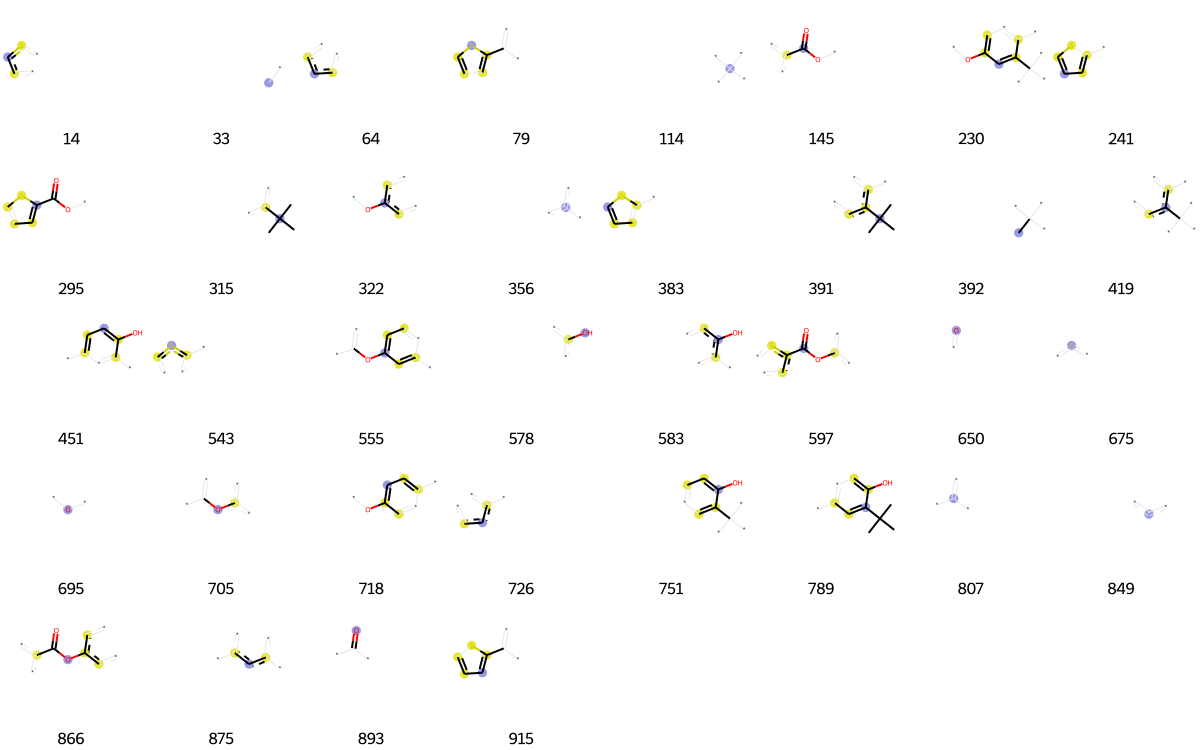

In [609]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [610]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 11,
 23,
 25,
 33,
 114,
 118,
 156,
 227,
 265,
 325,
 356,
 392,
 441,
 600,
 623,
 656,
 694,
 726,
 738,
 749,
 761,
 776,
 807,
 835,
 837,
 839,
 849,
 875,
 881,
 926,
 1009,
 1017]

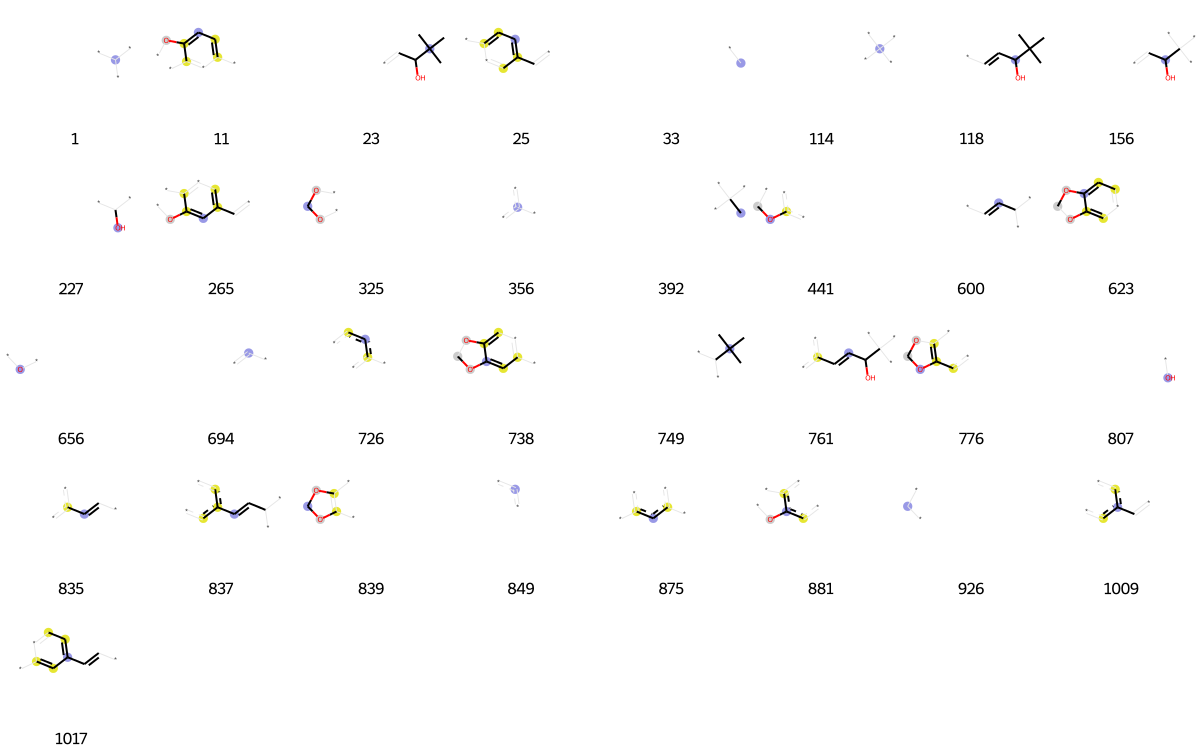

In [611]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [612]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 80,
 118,
 144,
 145,
 147,
 222,
 227,
 356,
 361,
 433,
 482,
 498,
 523,
 526,
 606,
 650,
 673,
 695,
 726,
 727,
 780,
 807,
 849,
 888,
 893,
 953,
 1014]

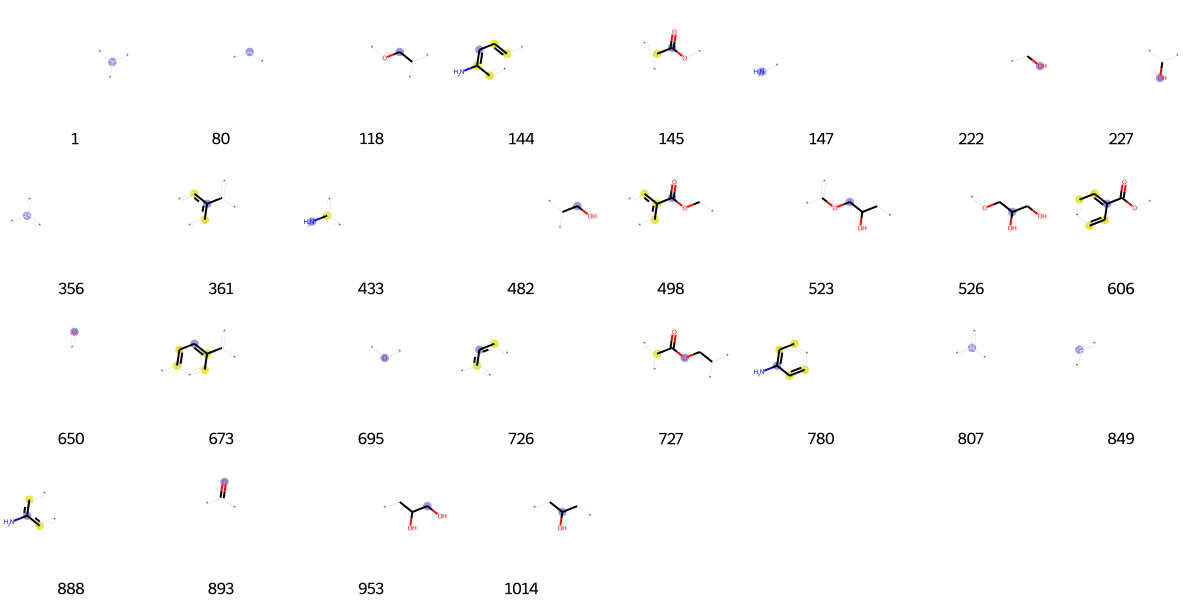

In [613]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [614]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 33,
 73,
 82,
 108,
 128,
 147,
 212,
 221,
 232,
 237,
 245,
 249,
 283,
 327,
 333,
 335,
 356,
 378,
 384,
 407,
 433,
 435,
 456,
 469,
 484,
 512,
 517,
 565,
 624,
 641,
 644,
 650,
 695,
 780,
 807,
 831,
 841,
 849,
 875,
 891,
 893,
 926,
 935,
 946,
 985]

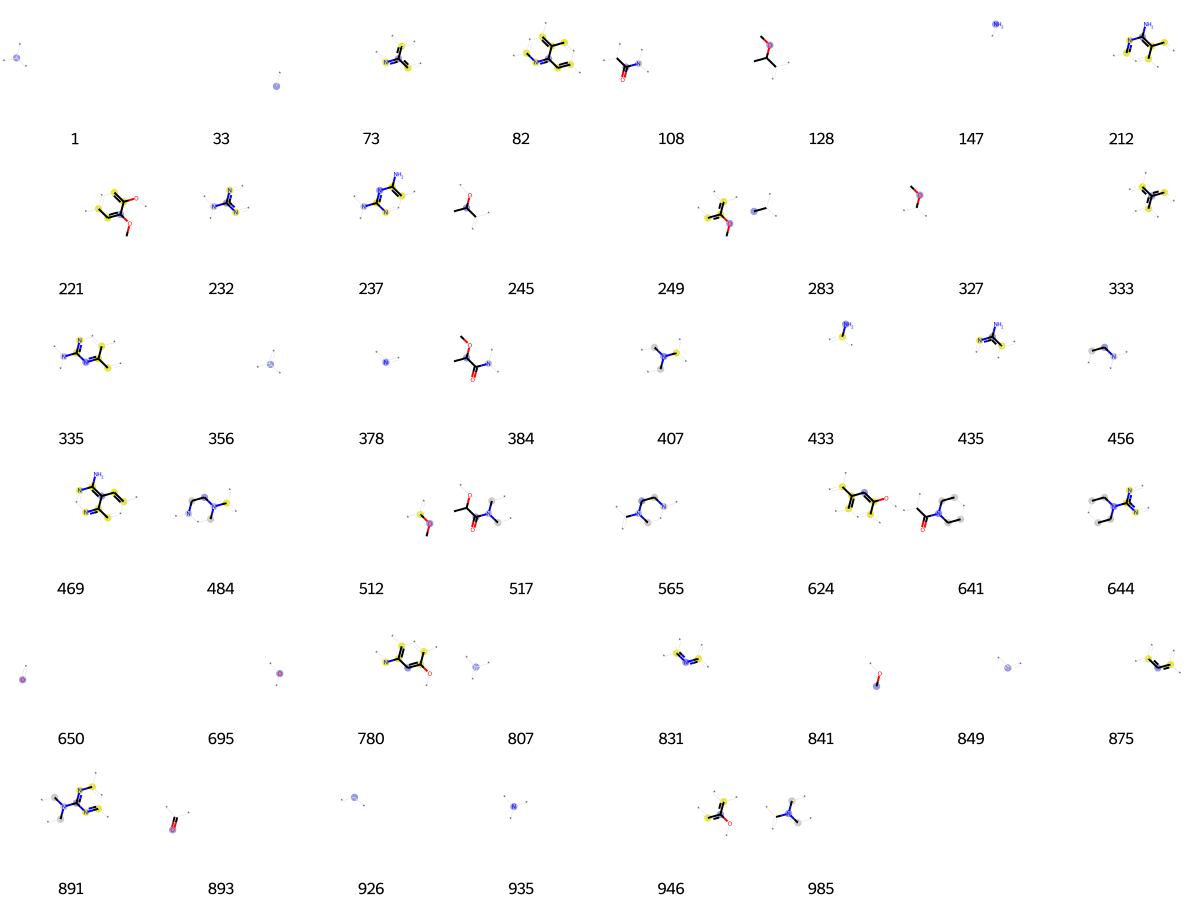

In [615]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [616]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[9,
 52,
 71,
 75,
 80,
 104,
 112,
 140,
 147,
 152,
 185,
 192,
 194,
 201,
 209,
 229,
 233,
 237,
 264,
 269,
 309,
 356,
 378,
 423,
 428,
 430,
 433,
 435,
 454,
 463,
 486,
 489,
 499,
 519,
 548,
 577,
 610,
 650,
 656,
 672,
 690,
 692,
 695,
 700,
 708,
 786,
 807,
 810,
 814,
 816,
 820,
 849,
 854,
 863,
 893,
 897,
 926,
 932,
 935,
 962,
 967,
 970,
 972,
 980,
 1019,
 1020]

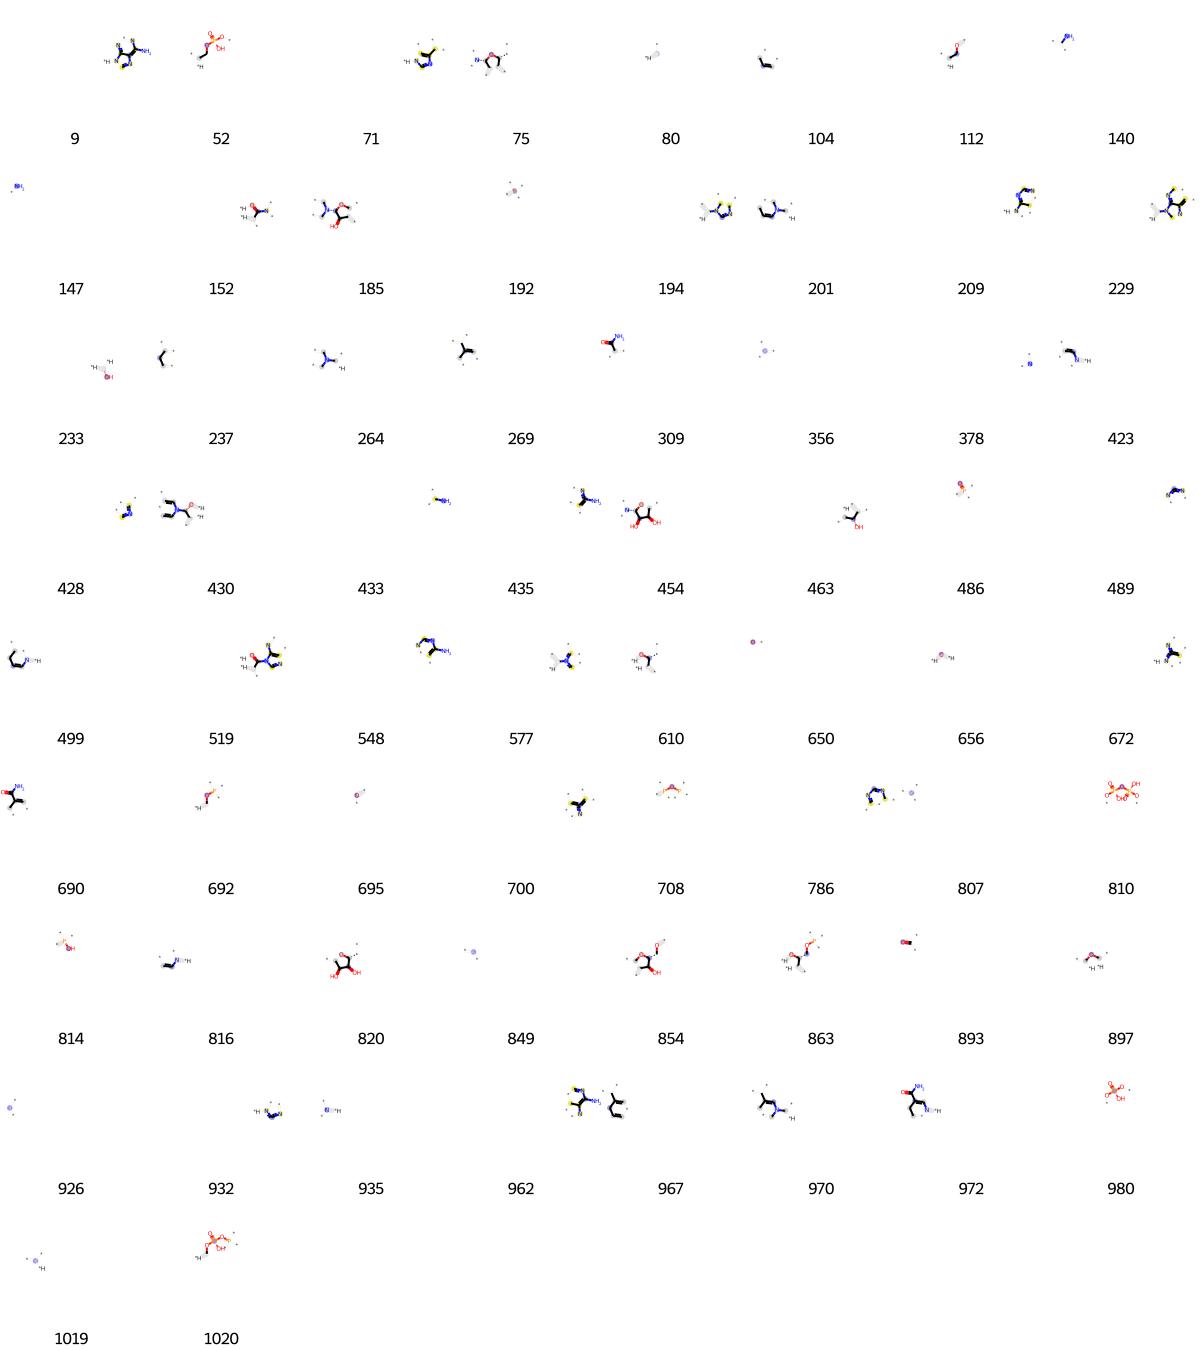

In [617]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [618]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 11,
 15,
 33,
 36,
 64,
 69,
 82,
 90,
 112,
 128,
 143,
 145,
 147,
 171,
 217,
 250,
 255,
 283,
 356,
 360,
 396,
 440,
 585,
 586,
 627,
 639,
 650,
 674,
 695,
 698,
 715,
 726,
 753,
 785,
 790,
 807,
 838,
 839,
 841,
 849,
 871,
 875,
 878,
 893,
 900,
 906,
 916,
 939,
 954,
 987,
 1005,
 1019]

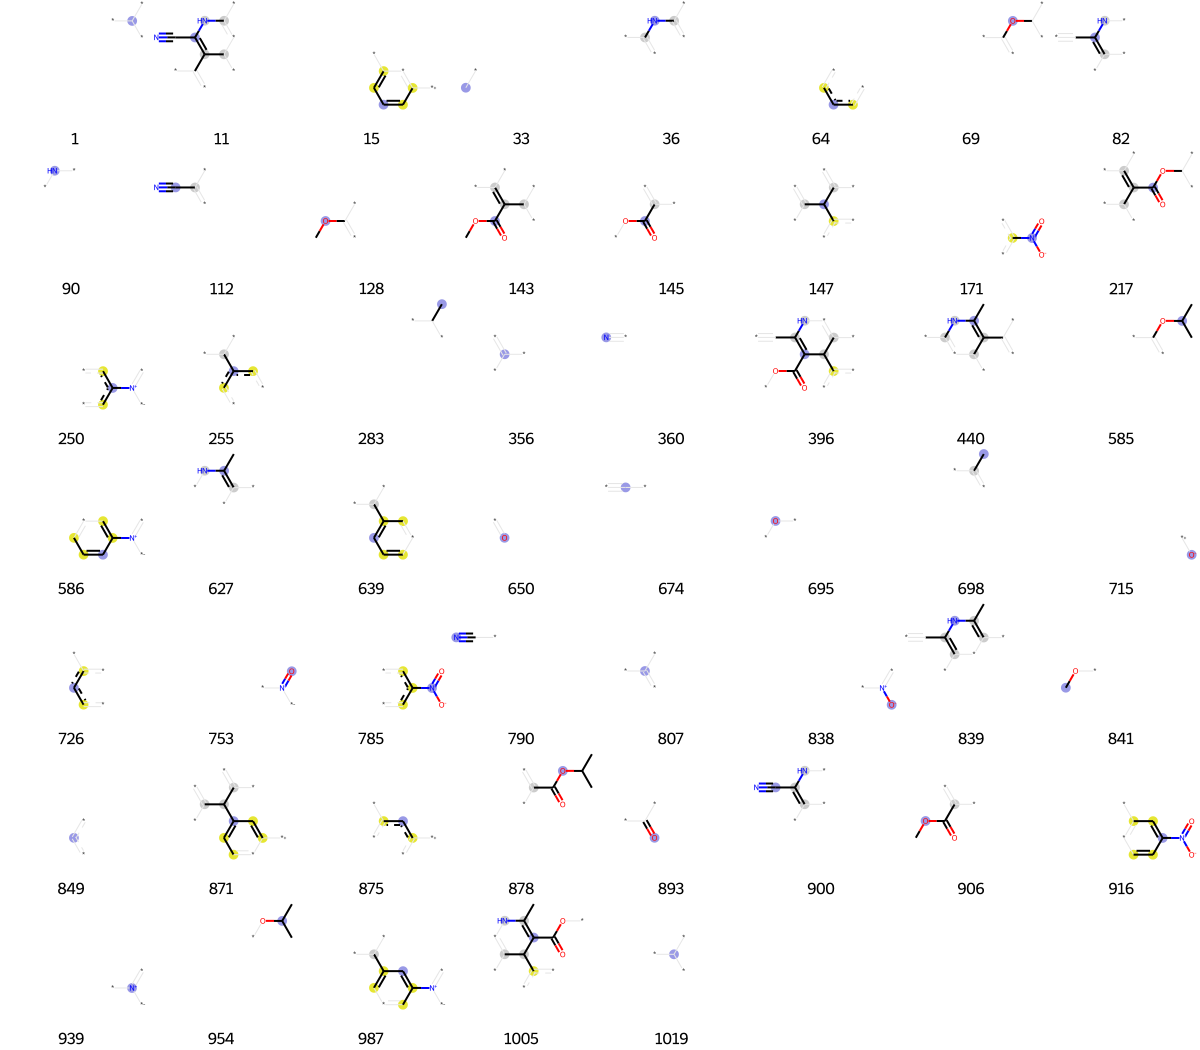

In [619]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [620]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 9,
 15,
 33,
 64,
 75,
 105,
 128,
 175,
 177,
 283,
 329,
 341,
 356,
 361,
 378,
 379,
 389,
 428,
 524,
 557,
 573,
 594,
 604,
 650,
 697,
 698,
 726,
 751,
 787,
 792,
 799,
 807,
 842,
 849,
 875,
 893,
 900,
 961,
 993,
 997,
 1002,
 1013]

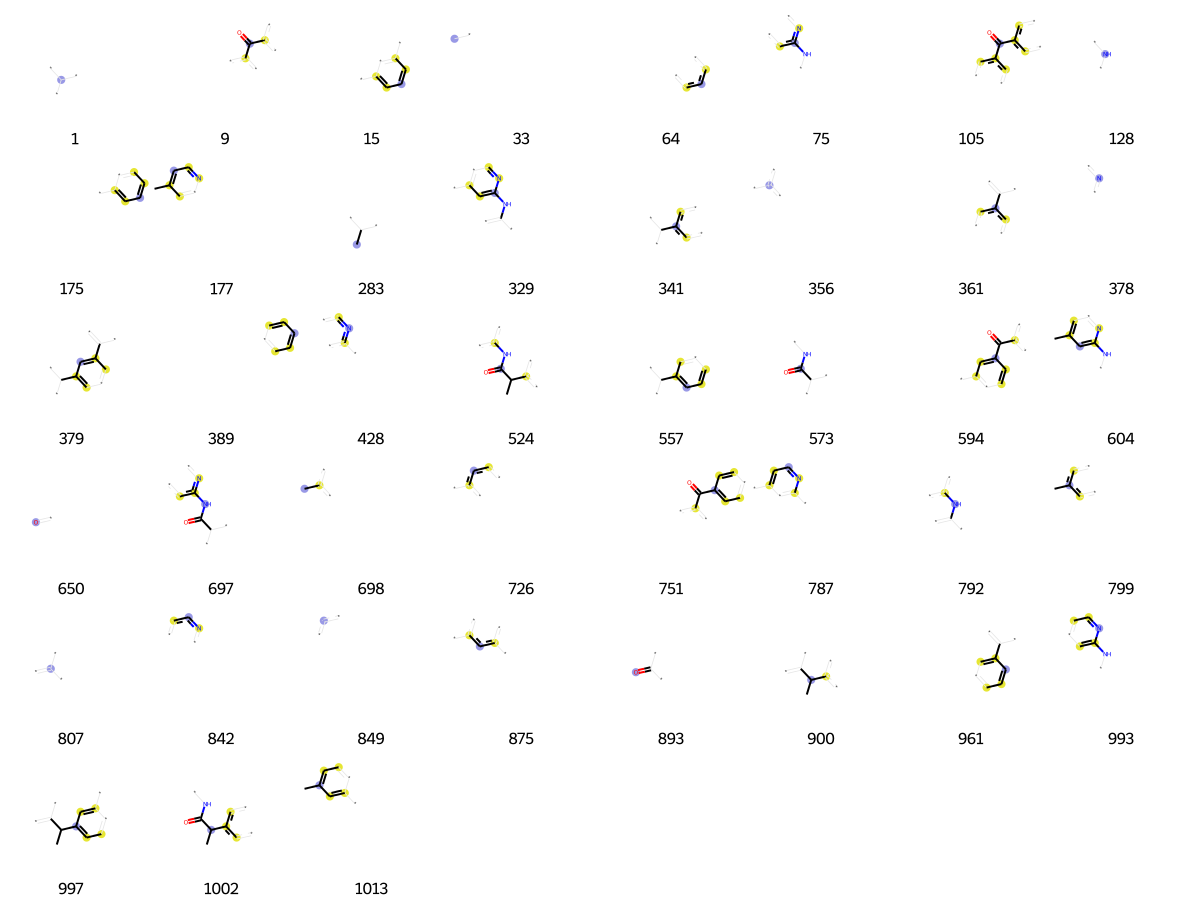

In [621]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [622]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 21,
 33,
 80,
 128,
 219,
 227,
 263,
 283,
 289,
 310,
 338,
 341,
 356,
 514,
 516,
 573,
 578,
 606,
 632,
 726,
 730,
 732,
 739,
 745,
 754,
 782,
 807,
 829,
 849,
 949,
 994,
 1004]

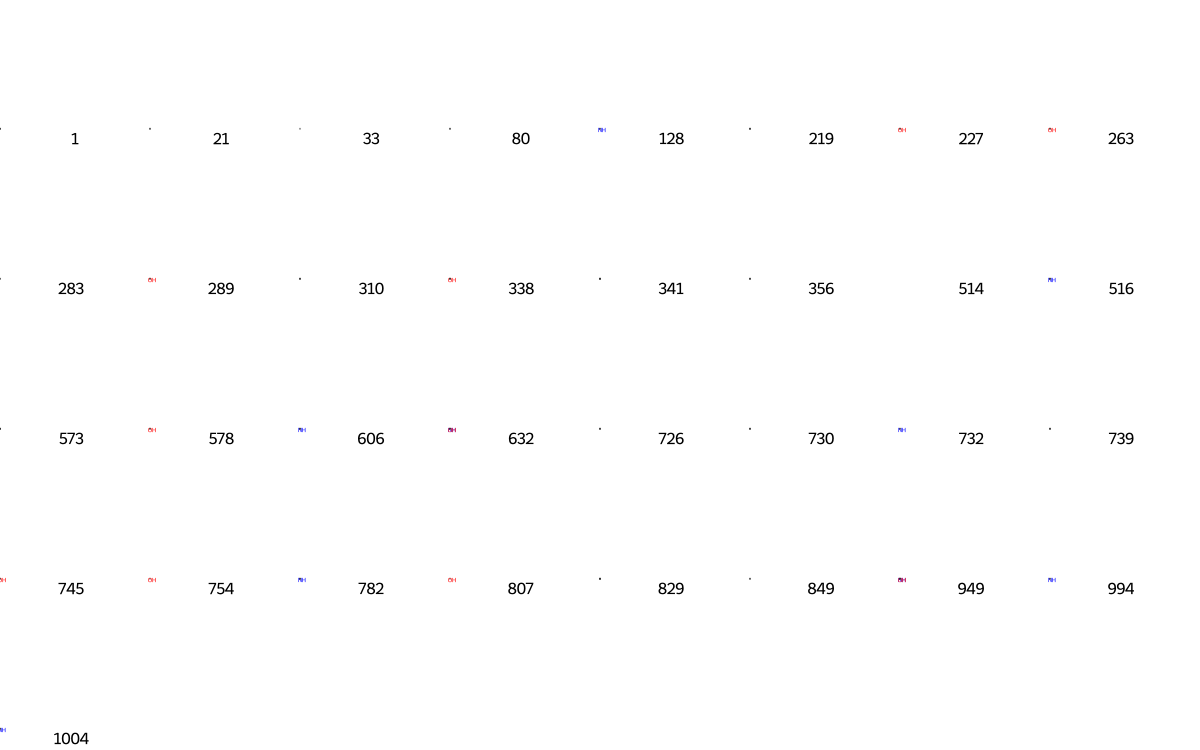

In [623]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [624]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 19,
 33,
 64,
 78,
 80,
 117,
 128,
 197,
 265,
 283,
 356,
 361,
 378,
 426,
 437,
 486,
 511,
 519,
 562,
 579,
 606,
 650,
 657,
 726,
 807,
 826,
 842,
 849,
 893,
 938,
 961,
 990,
 994]

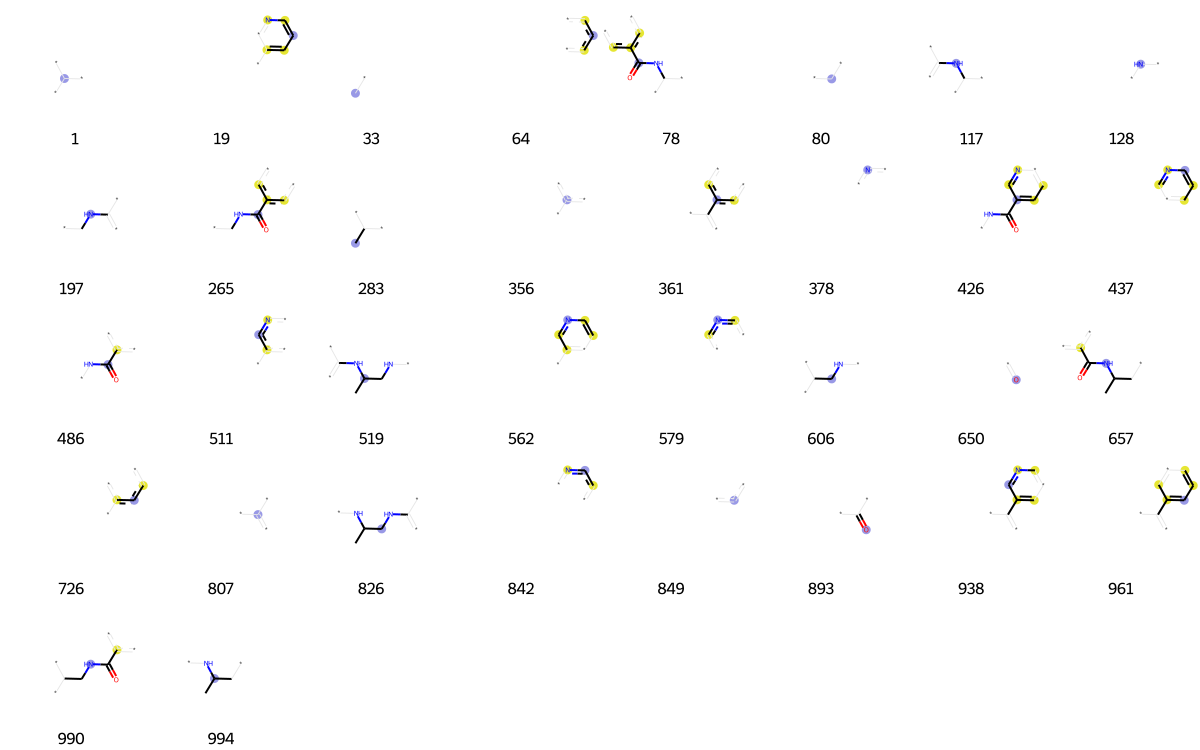

In [625]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [626]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 15,
 33,
 64,
 80,
 89,
 105,
 114,
 117,
 118,
 128,
 178,
 212,
 227,
 231,
 233,
 329,
 356,
 361,
 364,
 386,
 392,
 428,
 430,
 454,
 554,
 603,
 606,
 658,
 684,
 695,
 726,
 807,
 843,
 849,
 873,
 926,
 946,
 982,
 1014,
 1019]

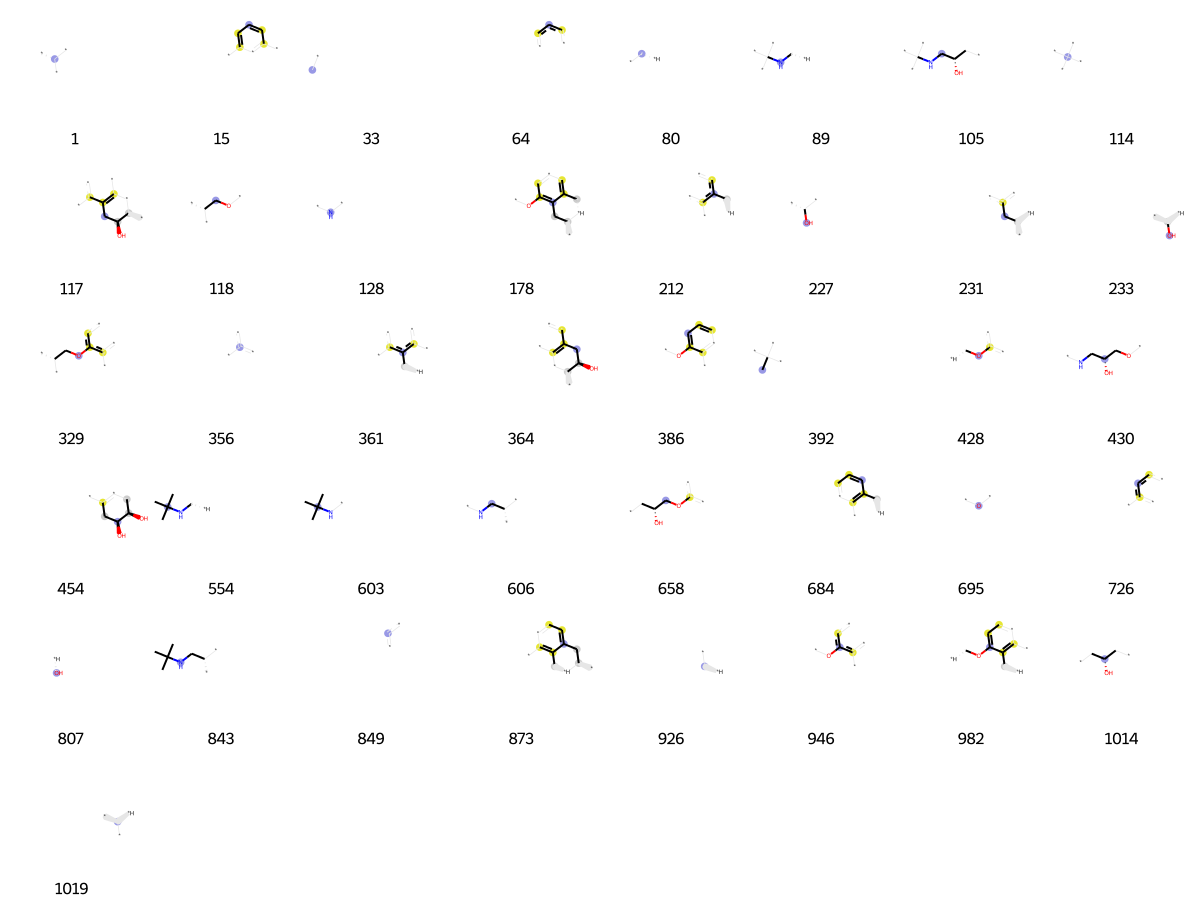

In [627]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [628]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 80,
 128,
 132,
 144,
 210,
 222,
 233,
 235,
 245,
 387,
 432,
 463,
 492,
 576,
 589,
 590,
 610,
 650,
 656,
 707,
 740,
 807,
 820,
 893,
 897,
 1017,
 1019]

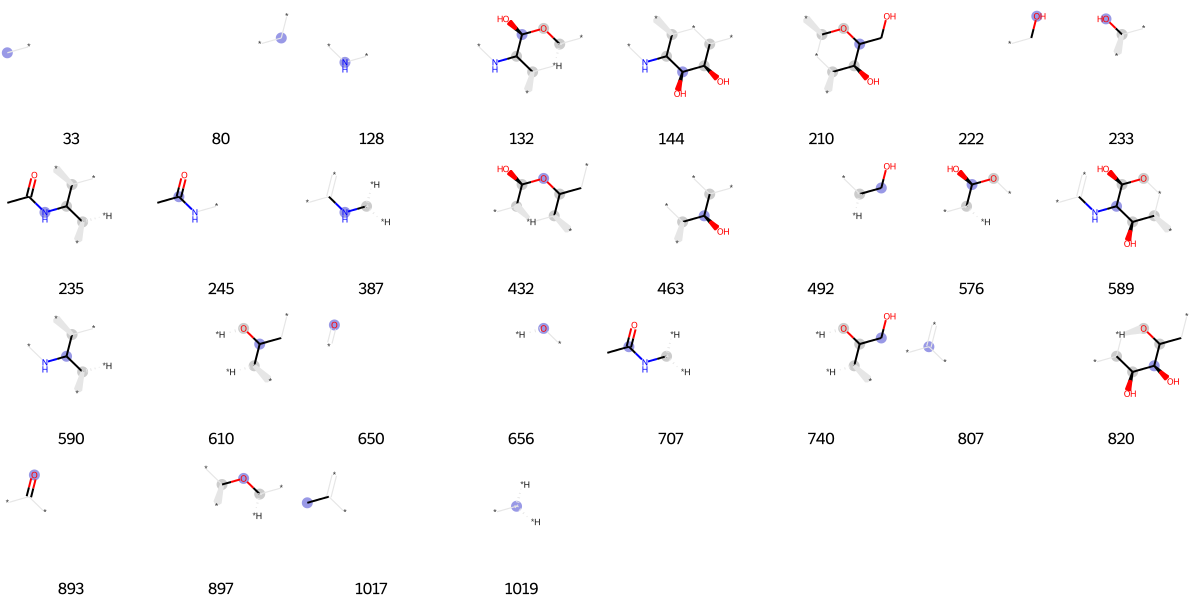

In [629]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [630]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 34,
 74,
 80,
 90,
 94,
 99,
 128,
 140,
 147,
 163,
 165,
 175,
 181,
 200,
 216,
 242,
 270,
 285,
 310,
 356,
 386,
 428,
 456,
 502,
 561,
 563,
 646,
 650,
 659,
 695,
 699,
 726,
 730,
 734,
 739,
 741,
 747,
 761,
 767,
 776,
 792,
 807,
 816,
 845,
 849,
 875,
 893,
 904,
 925,
 926,
 935,
 944,
 946,
 980,
 1005,
 1009,
 1019]

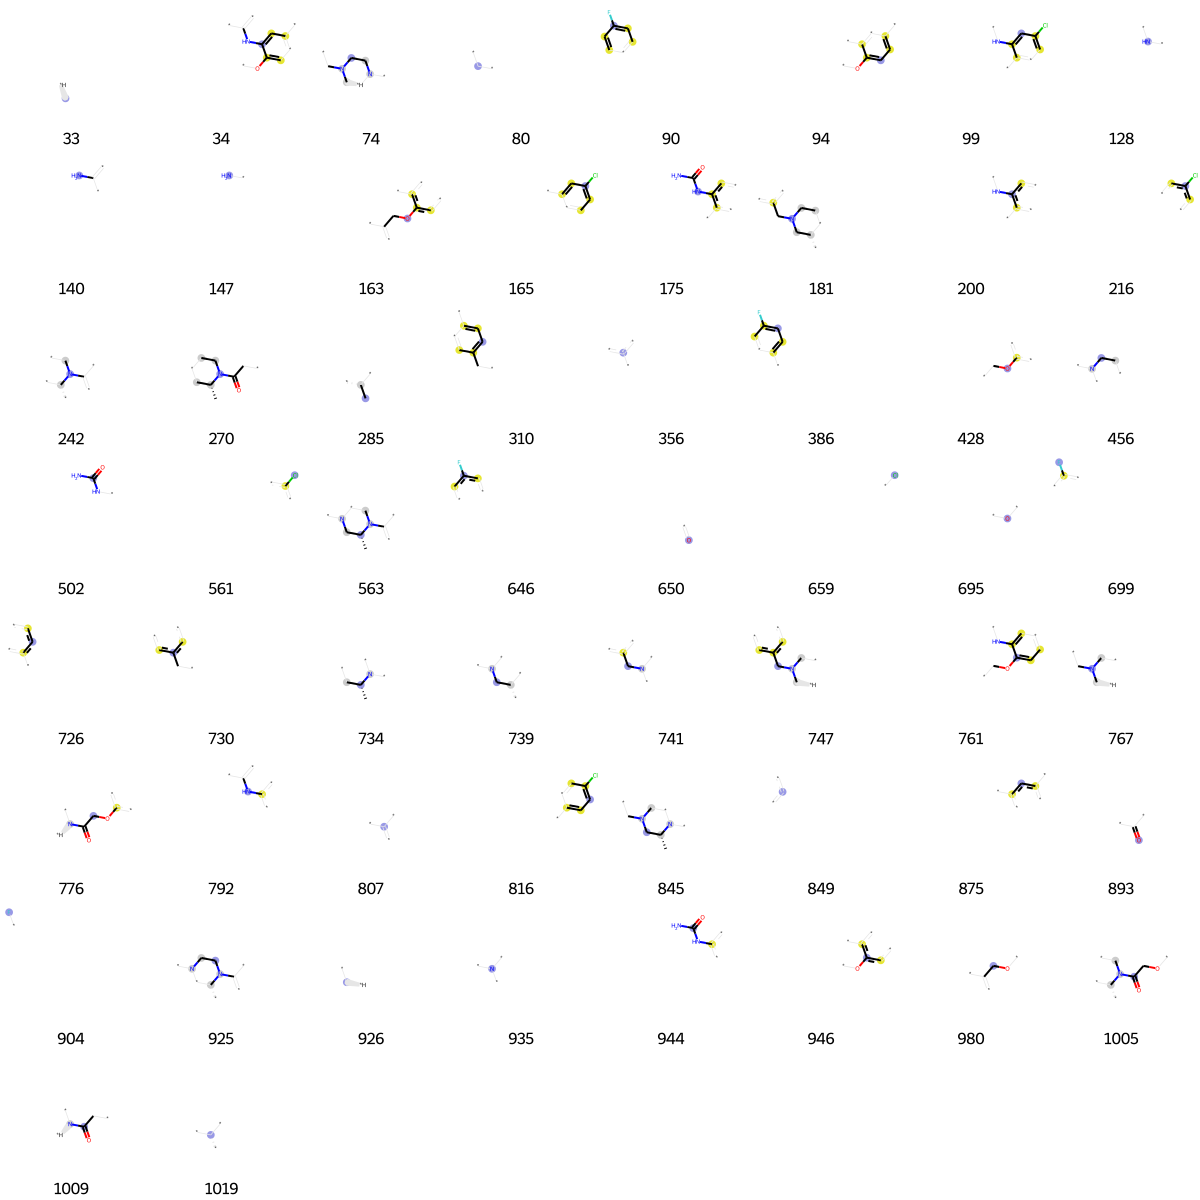

In [631]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [632]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 4,
 15,
 33,
 63,
 64,
 80,
 88,
 118,
 128,
 169,
 175,
 227,
 283,
 329,
 333,
 356,
 386,
 428,
 430,
 514,
 549,
 550,
 606,
 658,
 695,
 726,
 782,
 807,
 831,
 849,
 882,
 946,
 1006,
 1014]

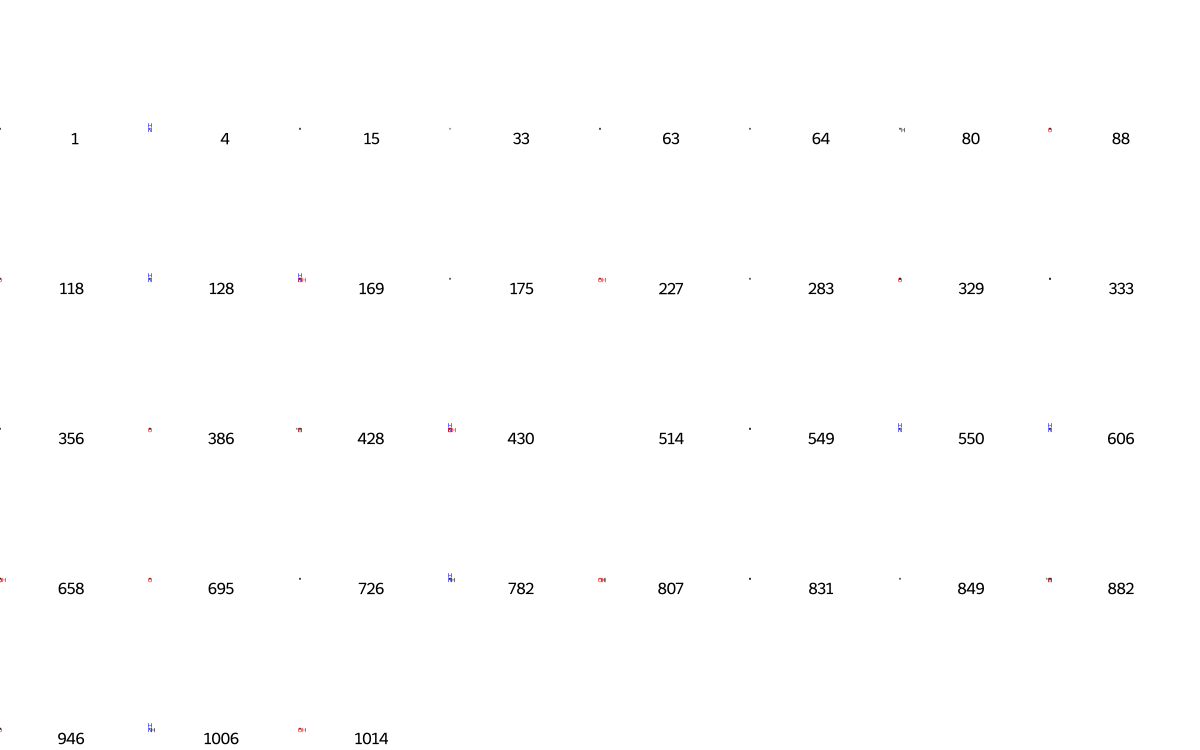

In [633]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [634]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[0,
 33,
 64,
 175,
 188,
 285,
 324,
 350,
 356,
 361,
 367,
 370,
 389,
 394,
 426,
 452,
 460,
 575,
 650,
 695,
 714,
 715,
 721,
 726,
 791,
 807,
 841,
 849,
 872,
 903,
 912,
 926,
 961,
 1019]

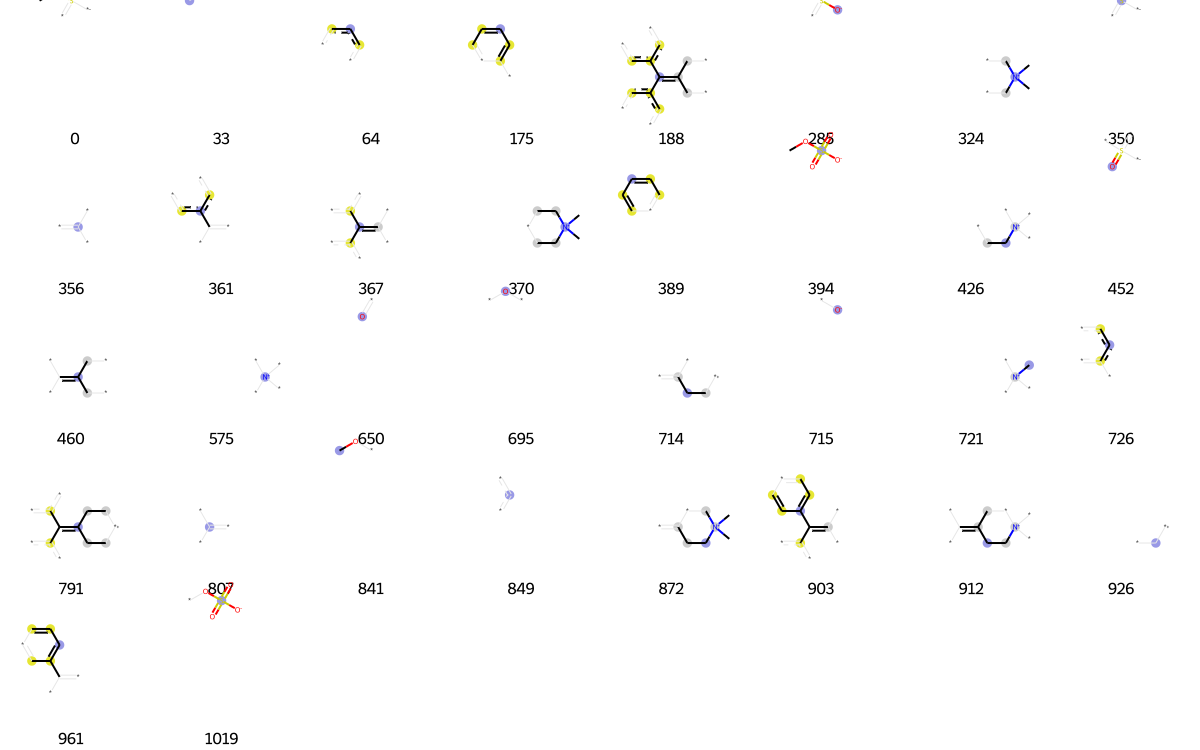

In [635]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [636]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[13,
 33,
 40,
 54,
 73,
 80,
 94,
 112,
 121,
 124,
 136,
 170,
 233,
 249,
 250,
 285,
 299,
 314,
 322,
 356,
 363,
 463,
 489,
 501,
 512,
 524,
 550,
 578,
 580,
 583,
 610,
 630,
 650,
 656,
 666,
 695,
 696,
 722,
 726,
 732,
 745,
 772,
 779,
 784,
 807,
 819,
 820,
 823,
 841,
 849,
 854,
 875,
 896,
 897,
 913,
 920,
 942,
 946,
 953,
 960,
 964,
 992,
 1019]

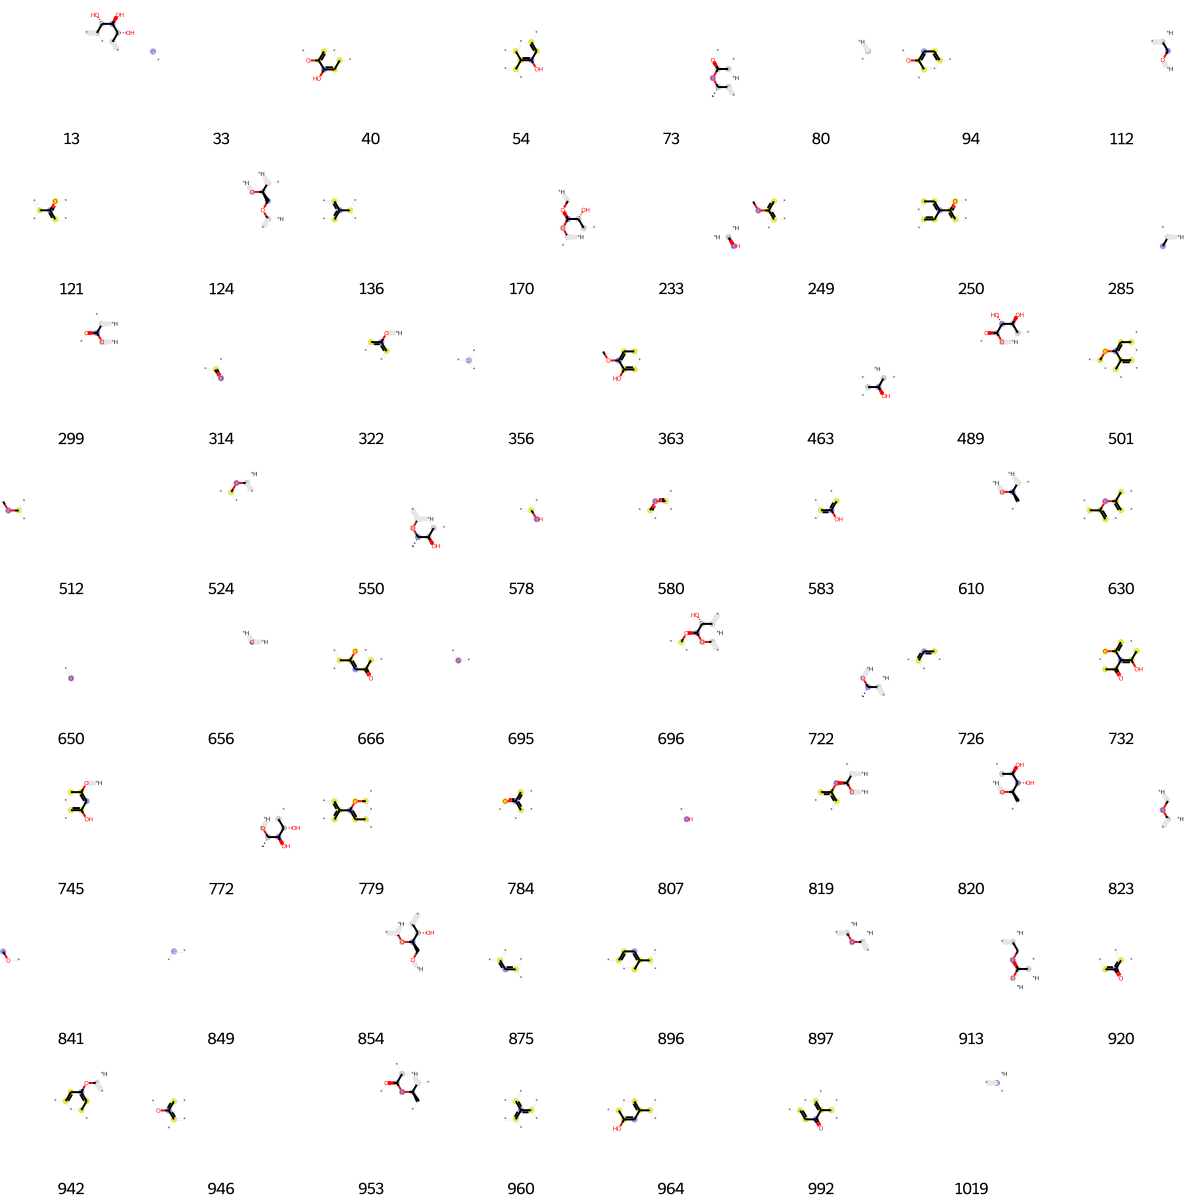

In [637]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [638]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[64,
 104,
 147,
 175,
 283,
 314,
 333,
 356,
 365,
 368,
 389,
 456,
 472,
 549,
 580,
 638,
 647,
 650,
 656,
 726,
 730,
 784,
 807,
 849,
 875,
 893,
 920]

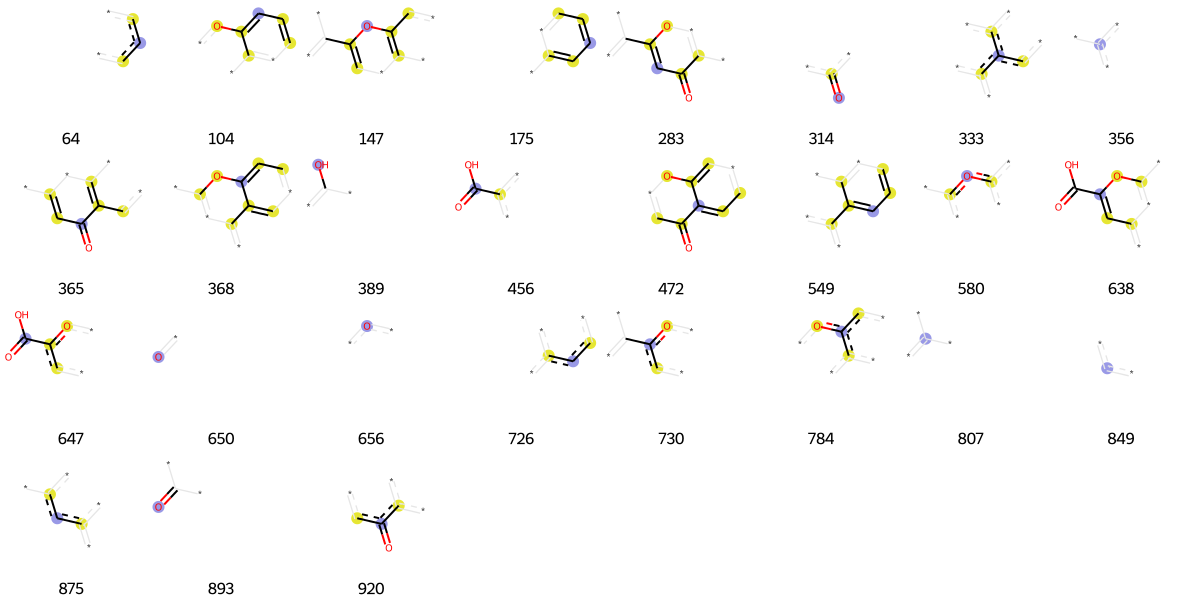

In [639]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [640]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[8,
 33,
 41,
 54,
 80,
 128,
 139,
 170,
 197,
 222,
 316,
 327,
 345,
 356,
 371,
 381,
 388,
 389,
 406,
 407,
 414,
 416,
 456,
 461,
 466,
 473,
 486,
 524,
 564,
 570,
 586,
 650,
 661,
 667,
 691,
 698,
 707,
 723,
 792,
 807,
 881,
 893,
 930,
 947,
 955,
 981,
 1017,
 1021,
 1023]

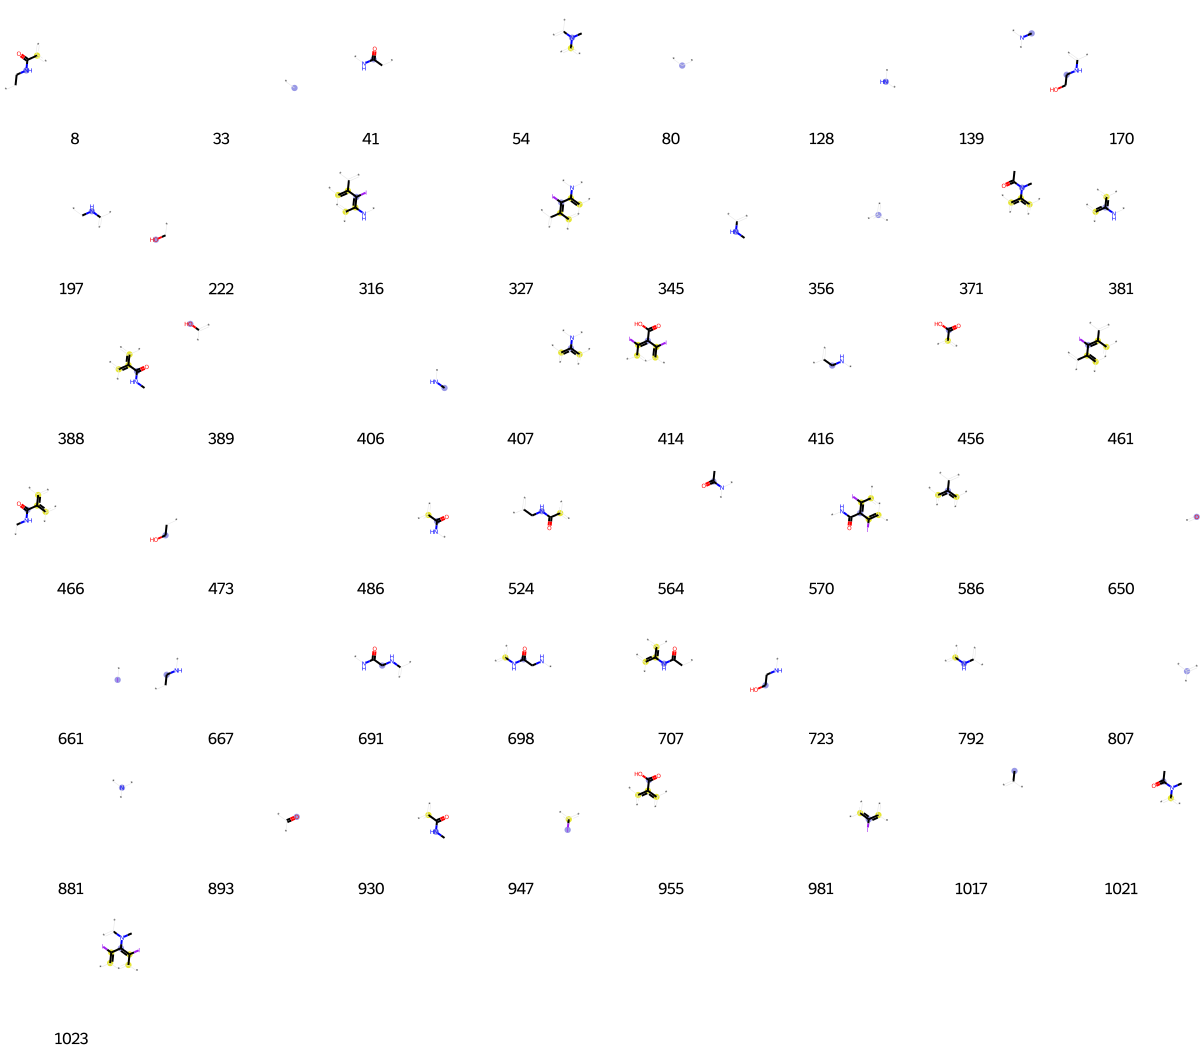

In [641]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [642]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[63,
 64,
 104,
 175,
 203,
 239,
 314,
 356,
 580,
 614,
 616,
 650,
 656,
 726,
 784,
 803,
 831,
 849,
 852,
 888]

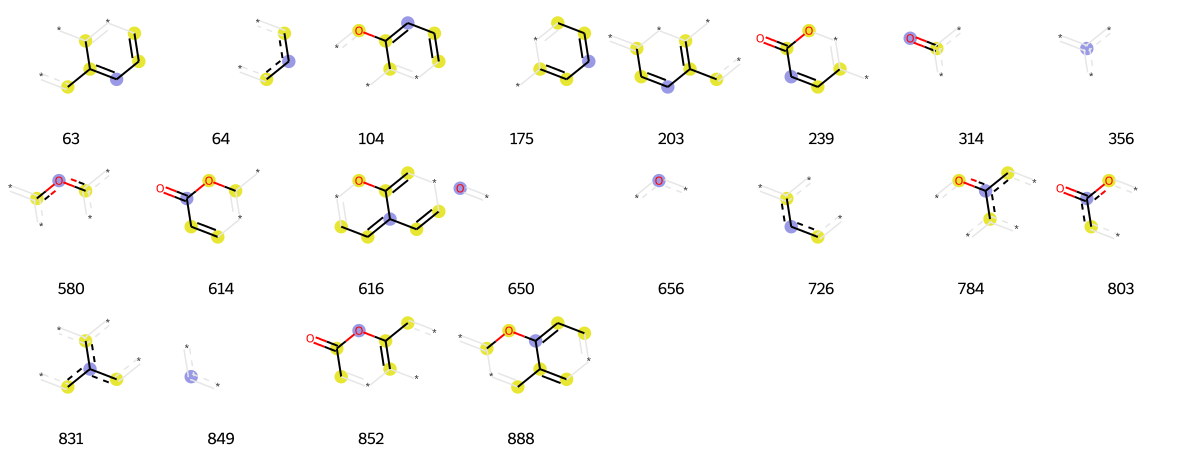

In [643]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [644]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[12,
 15,
 31,
 33,
 54,
 64,
 121,
 128,
 157,
 230,
 233,
 293,
 327,
 356,
 361,
 463,
 464,
 564,
 607,
 643,
 646,
 650,
 689,
 694,
 699,
 726,
 793,
 807,
 835,
 849,
 855,
 875,
 878,
 893,
 904,
 935,
 961,
 978,
 1016]

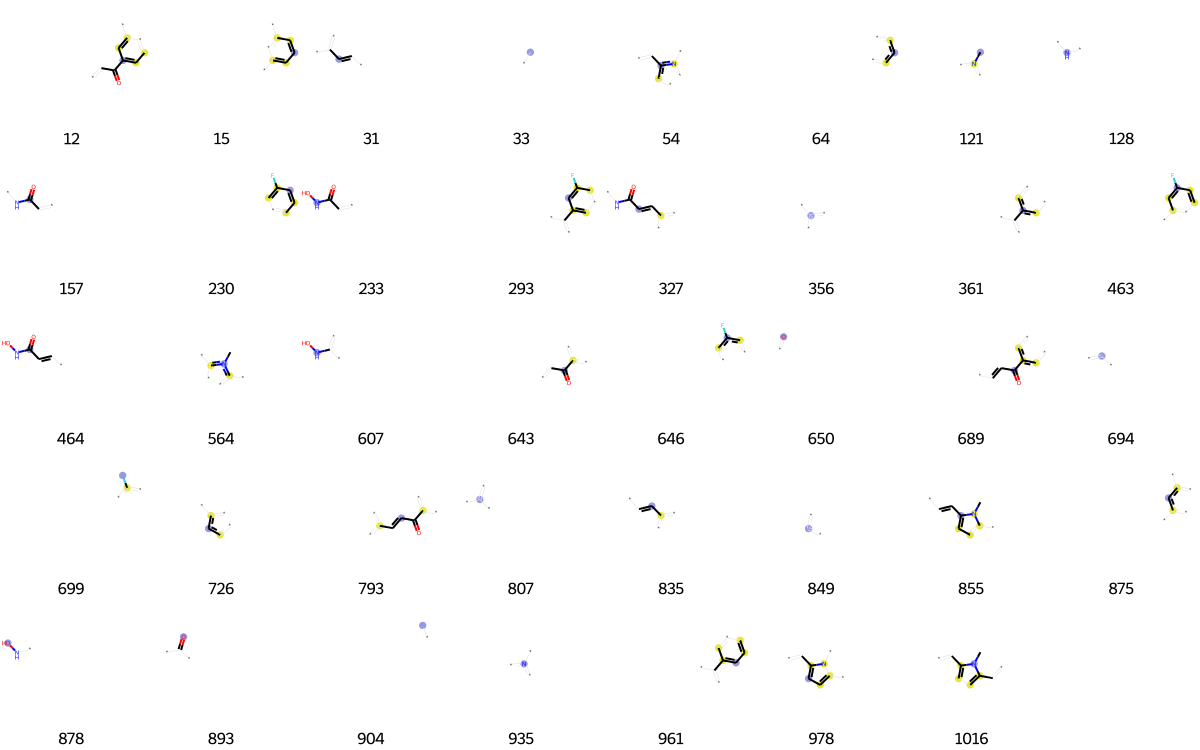

In [645]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [646]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[7,
 11,
 16,
 19,
 33,
 36,
 64,
 102,
 119,
 136,
 138,
 161,
 163,
 182,
 186,
 231,
 245,
 250,
 257,
 260,
 301,
 302,
 350,
 356,
 377,
 378,
 437,
 504,
 511,
 519,
 521,
 529,
 562,
 579,
 598,
 622,
 650,
 694,
 695,
 696,
 726,
 736,
 757,
 767,
 807,
 842,
 849,
 854,
 860,
 893,
 926,
 987,
 1017,
 1019]

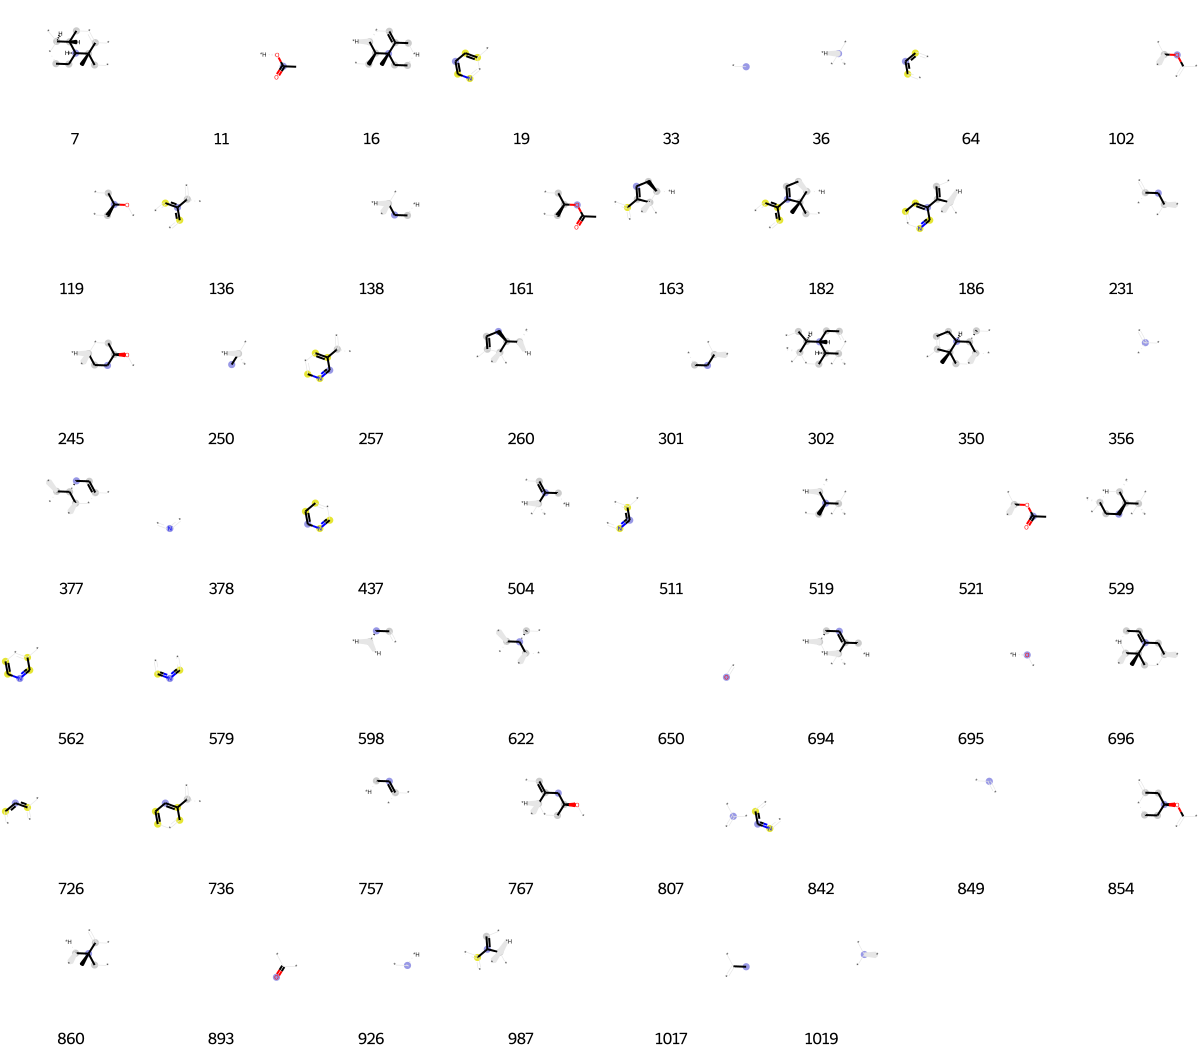

In [647]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [648]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[13,
 33,
 80,
 144,
 145,
 147,
 172,
 251,
 294,
 356,
 361,
 433,
 498,
 514,
 568,
 606,
 620,
 644,
 650,
 673,
 695,
 726,
 780,
 807,
 849,
 881,
 888,
 893,
 927,
 932,
 957]

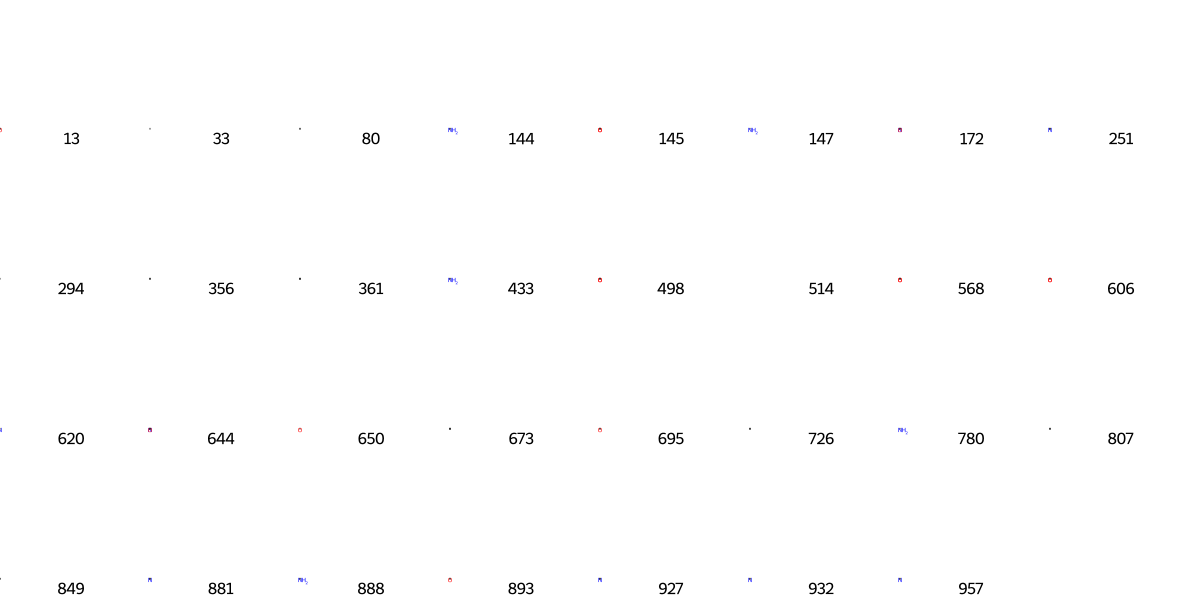

In [649]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [650]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 31,
 33,
 65,
 80,
 118,
 142,
 204,
 227,
 231,
 233,
 283,
 294,
 304,
 314,
 332,
 334,
 356,
 370,
 384,
 389,
 401,
 416,
 451,
 508,
 540,
 549,
 575,
 578,
 591,
 599,
 600,
 628,
 650,
 656,
 680,
 694,
 717,
 737,
 739,
 775,
 794,
 796,
 807,
 832,
 849,
 887,
 893,
 926,
 965,
 976,
 989,
 1019,
 1023]

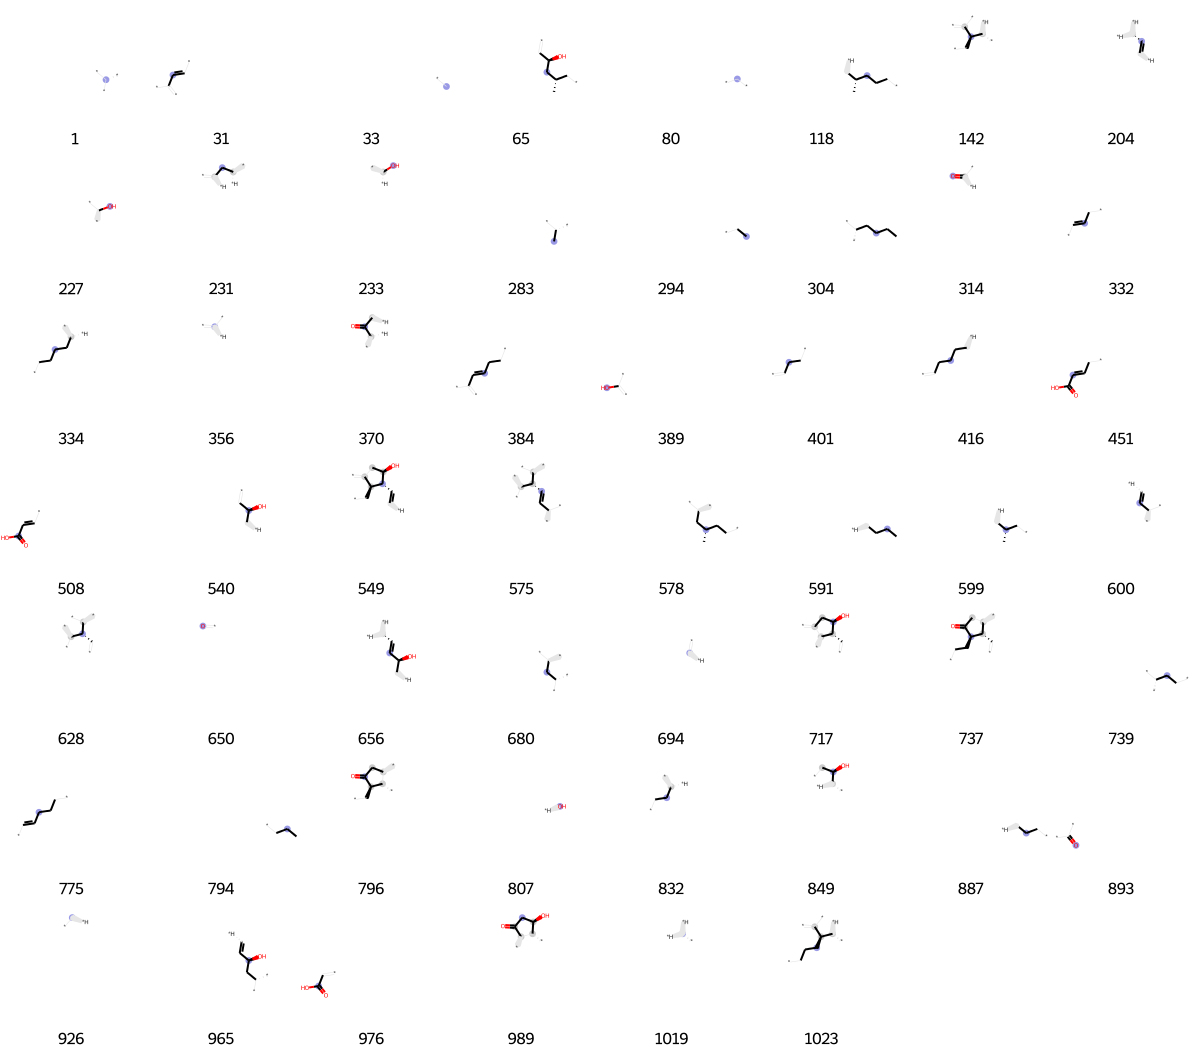

In [651]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [652]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 14,
 19,
 33,
 36,
 53,
 64,
 80,
 87,
 100,
 128,
 138,
 157,
 184,
 191,
 248,
 255,
 337,
 350,
 356,
 360,
 378,
 383,
 392,
 416,
 423,
 428,
 448,
 452,
 484,
 486,
 493,
 556,
 579,
 592,
 598,
 614,
 638,
 650,
 674,
 692,
 708,
 726,
 730,
 790,
 792,
 807,
 842,
 843,
 847,
 849,
 853,
 893,
 926,
 933,
 954,
 967,
 980]

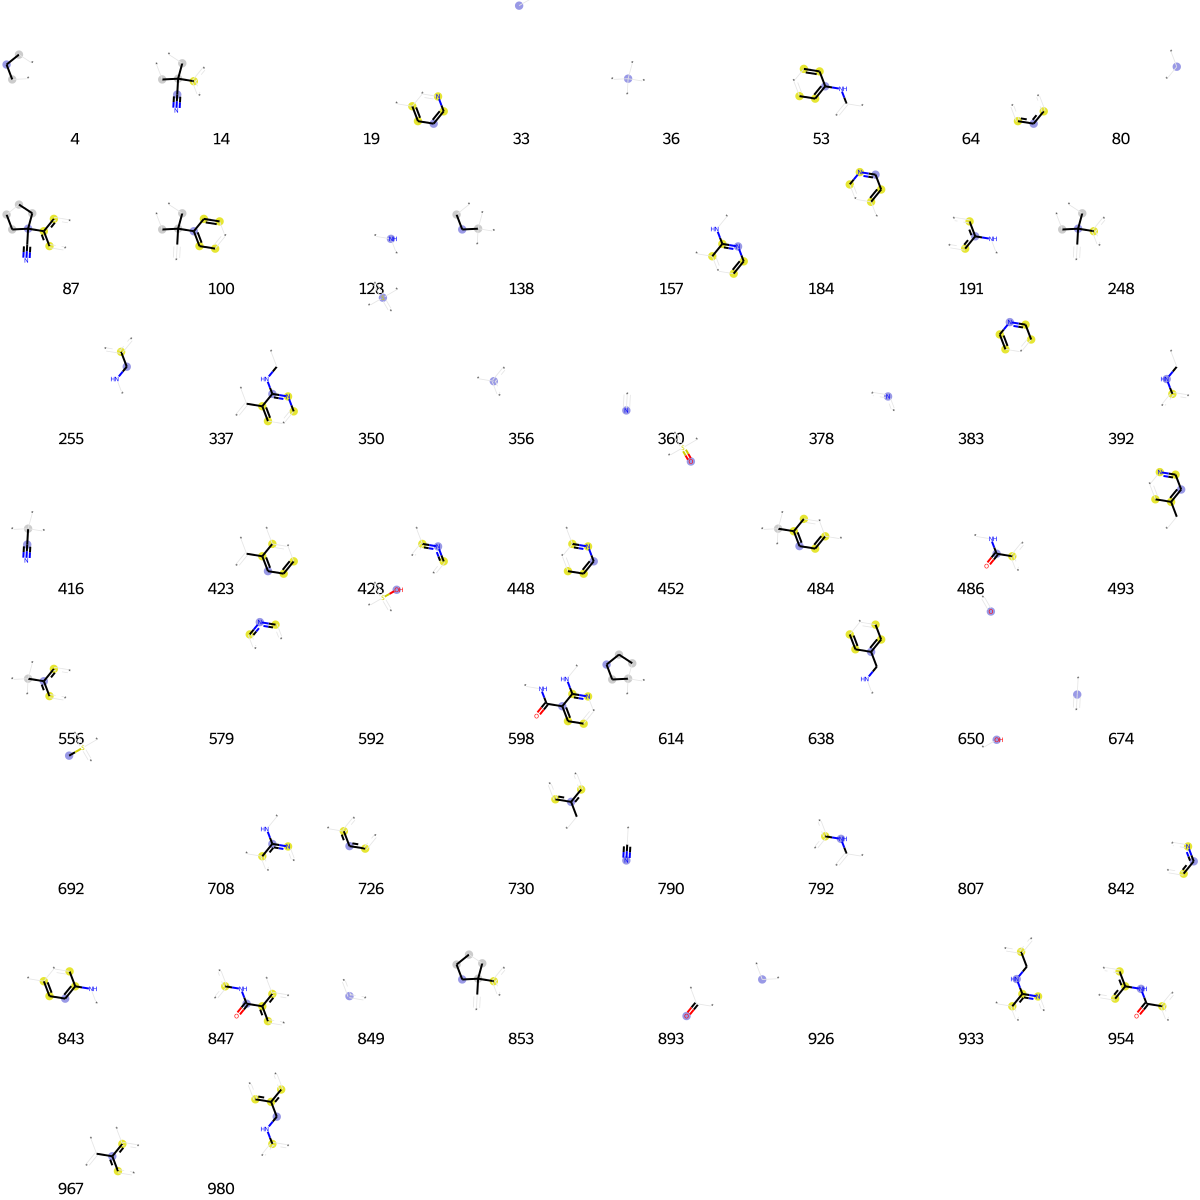

In [653]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [654]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[8,
 19,
 33,
 63,
 64,
 80,
 128,
 136,
 139,
 197,
 204,
 243,
 265,
 290,
 356,
 361,
 378,
 428,
 448,
 473,
 475,
 486,
 578,
 583,
 641,
 650,
 652,
 667,
 673,
 693,
 700,
 726,
 807,
 831,
 842,
 849,
 852,
 875,
 881,
 887,
 893,
 896,
 915,
 927,
 940,
 945,
 946,
 964]

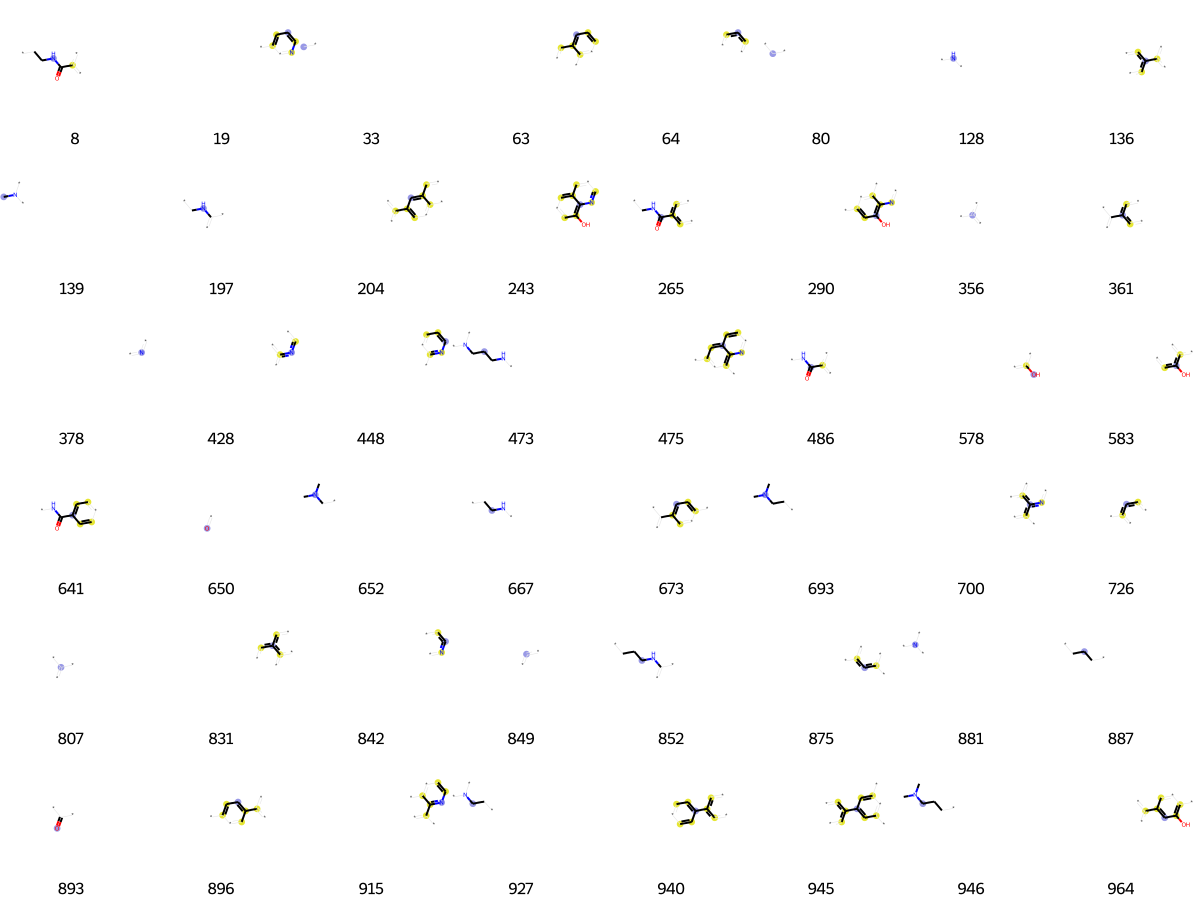

In [655]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [656]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[4,
 33,
 53,
 64,
 92,
 128,
 131,
 175,
 191,
 204,
 217,
 232,
 246,
 248,
 252,
 257,
 319,
 333,
 338,
 350,
 356,
 367,
 378,
 379,
 414,
 420,
 428,
 448,
 452,
 483,
 486,
 502,
 518,
 613,
 626,
 650,
 656,
 673,
 698,
 700,
 715,
 726,
 749,
 792,
 799,
 807,
 827,
 831,
 842,
 843,
 847,
 849,
 875,
 883,
 893,
 929,
 950,
 954,
 961,
 967,
 980,
 1007]

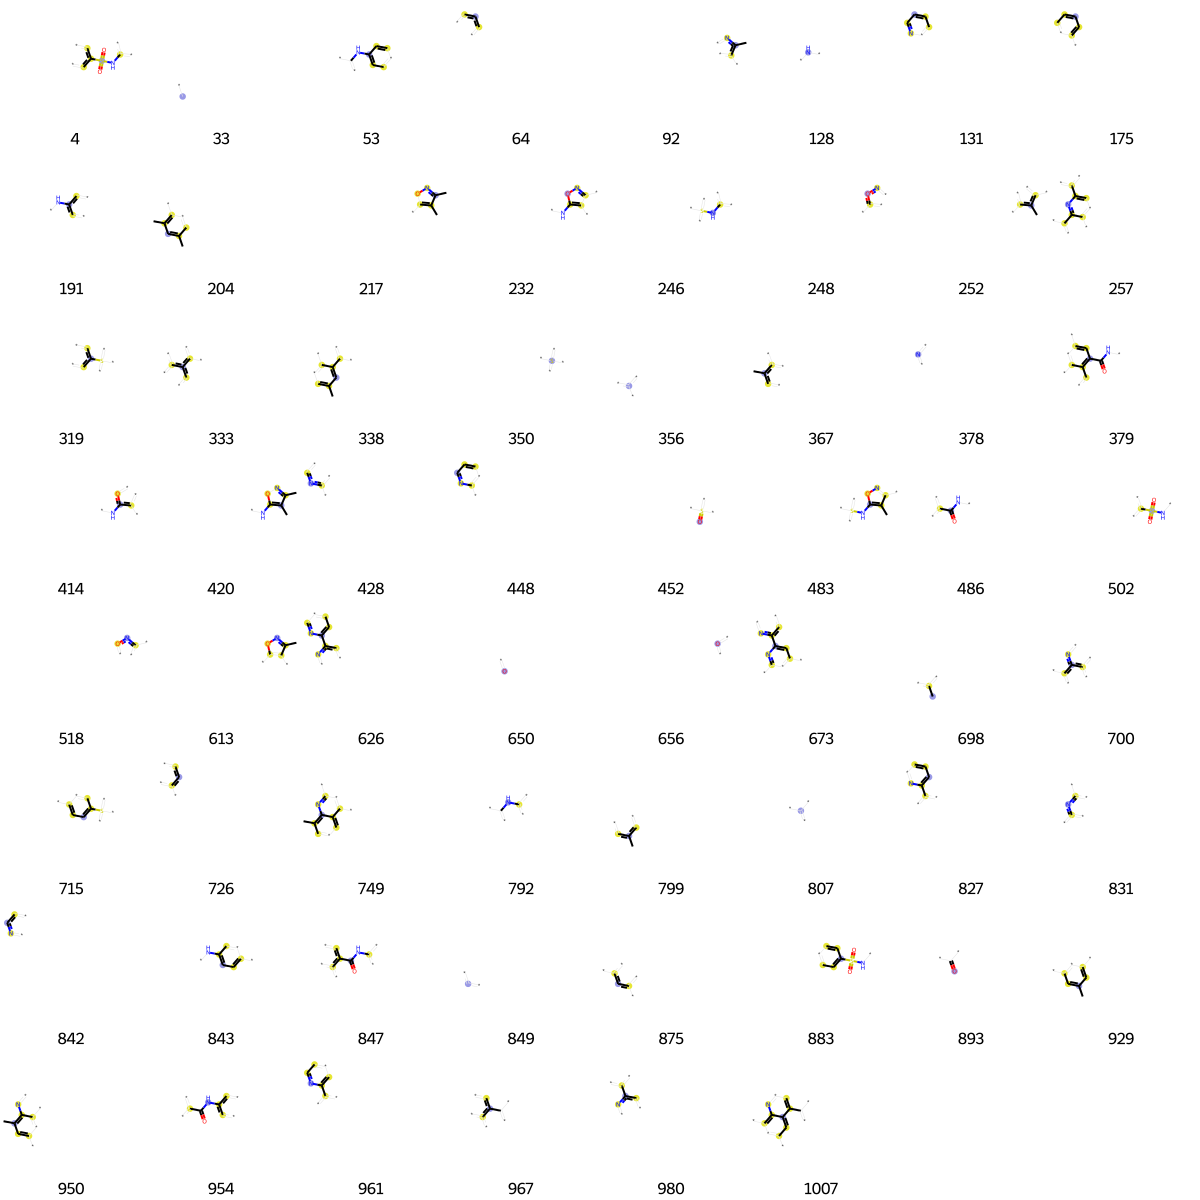

In [657]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [658]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[26,
 33,
 36,
 46,
 71,
 105,
 124,
 138,
 144,
 186,
 192,
 222,
 233,
 250,
 255,
 265,
 266,
 268,
 285,
 301,
 320,
 324,
 345,
 385,
 445,
 453,
 500,
 508,
 519,
 522,
 528,
 529,
 590,
 622,
 645,
 656,
 775,
 795,
 807,
 890,
 899,
 926,
 927,
 956,
 999,
 1009,
 1014,
 1017,
 1019]

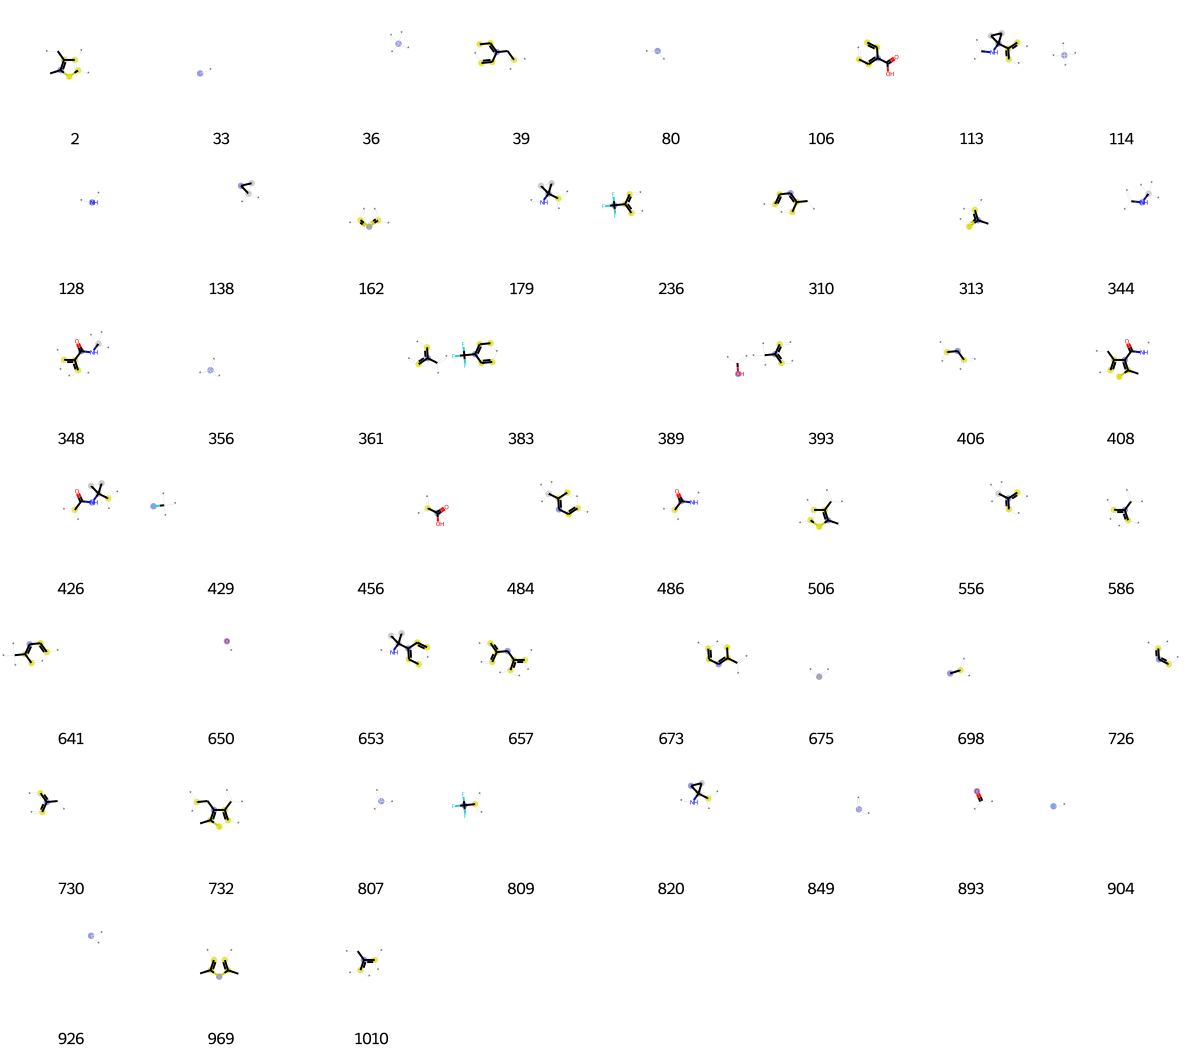

In [659]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [660]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 39,
 53,
 56,
 64,
 128,
 136,
 175,
 191,
 209,
 211,
 285,
 301,
 356,
 361,
 389,
 407,
 497,
 612,
 619,
 650,
 673,
 703,
 726,
 755,
 792,
 807,
 843,
 849,
 893,
 896,
 905,
 926,
 940,
 965,
 966,
 1019]

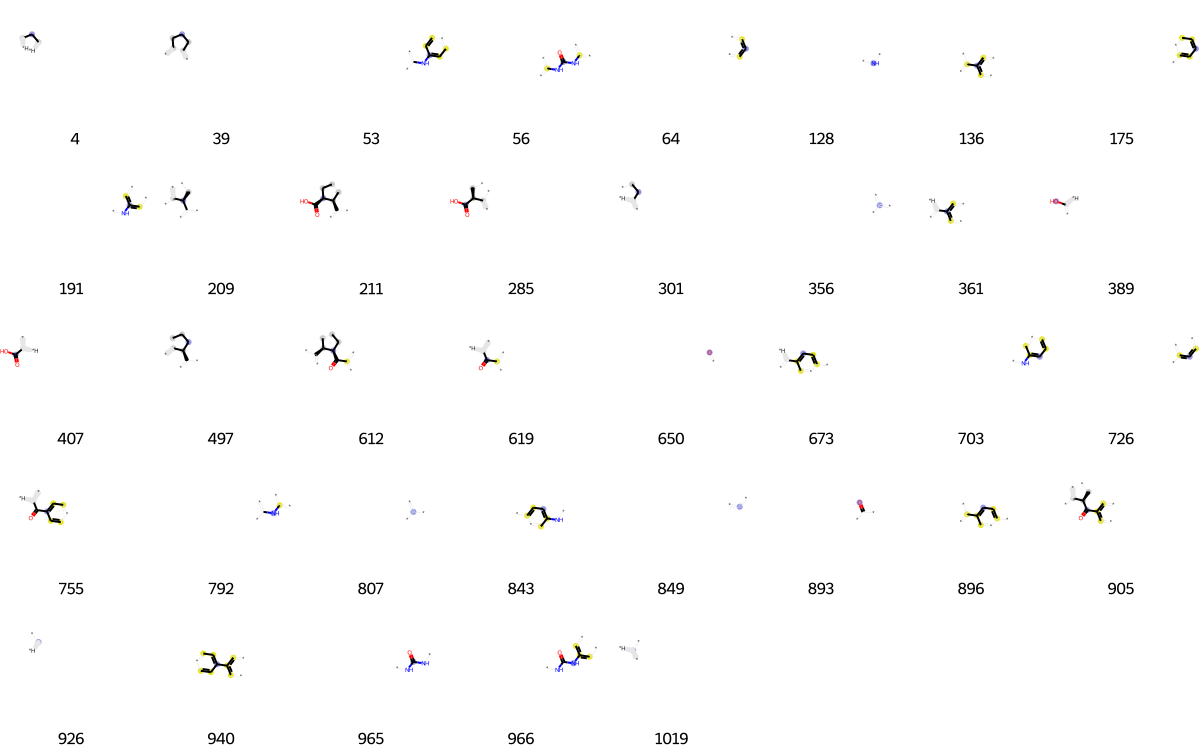

In [661]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [662]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[46,
 128,
 190,
 191,
 216,
 225,
 284,
 301,
 356,
 361,
 379,
 387,
 449,
 456,
 486,
 531,
 549,
 561,
 585,
 641,
 650,
 659,
 660,
 673,
 726,
 729,
 739,
 807,
 816,
 849,
 893,
 926,
 935,
 1019]

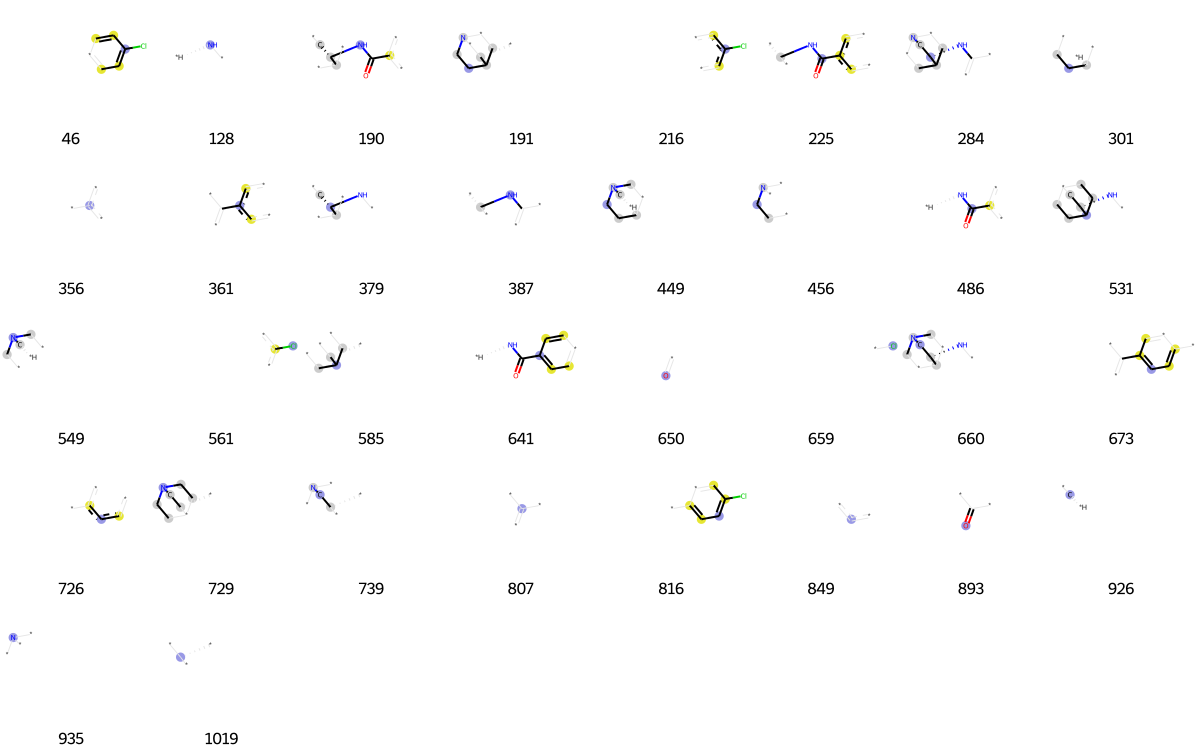

In [663]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [664]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[36,
 114,
 135,
 136,
 138,
 191,
 203,
 204,
 225,
 258,
 268,
 322,
 356,
 361,
 389,
 422,
 451,
 456,
 578,
 583,
 650,
 673,
 675,
 679,
 726,
 785,
 807,
 831,
 849,
 875,
 893,
 896,
 926,
 952,
 956,
 980,
 1019]

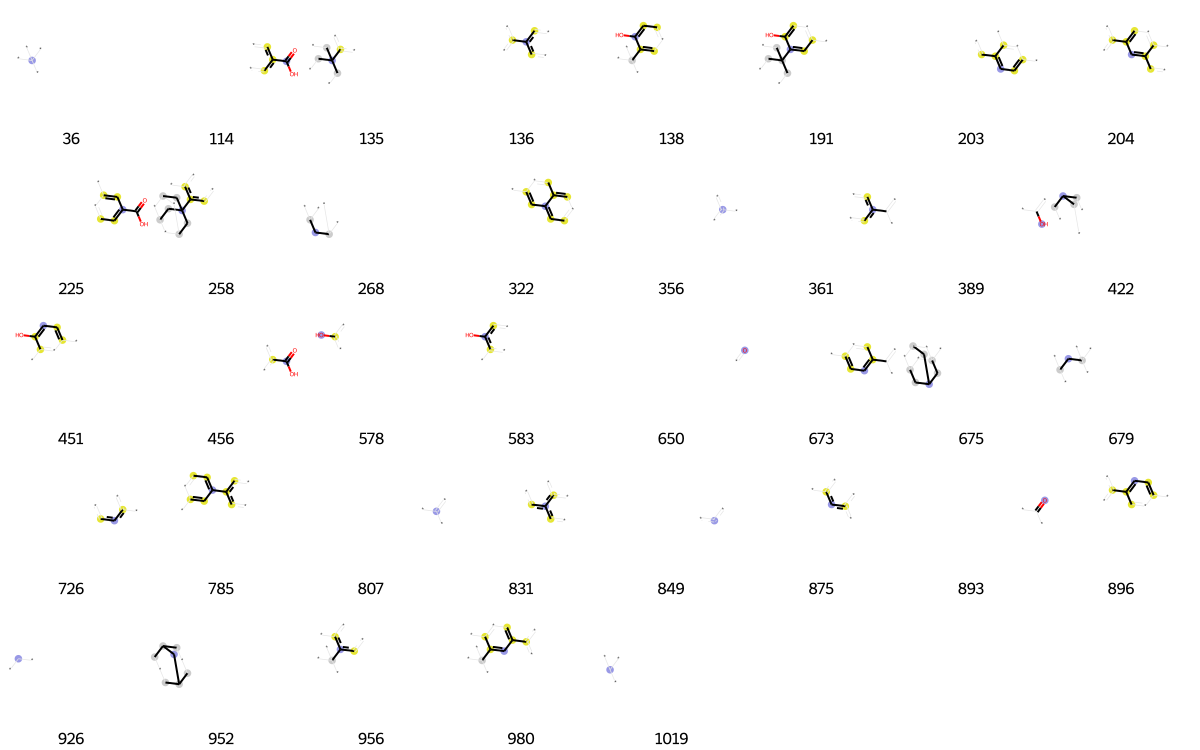

In [665]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [666]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[11,
 33,
 97,
 110,
 232,
 249,
 282,
 333,
 356,
 361,
 381,
 417,
 428,
 456,
 512,
 523,
 575,
 656,
 695,
 728,
 807,
 841,
 849,
 868,
 875,
 926,
 935,
 946,
 950,
 985]

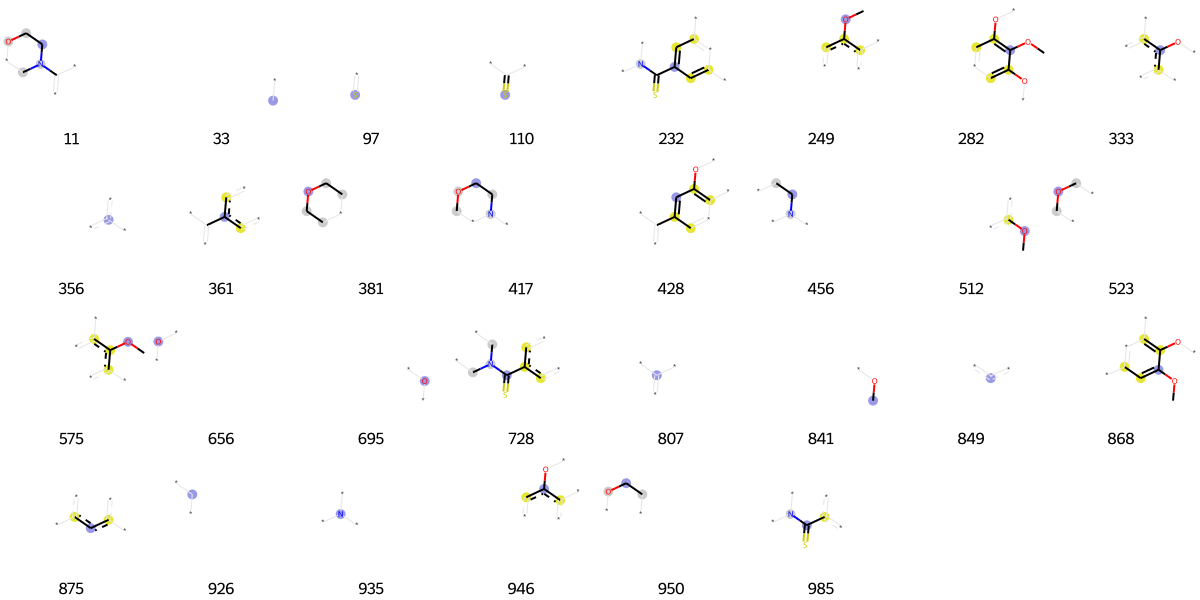

In [667]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [668]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[14,
 33,
 74,
 80,
 104,
 121,
 207,
 212,
 218,
 219,
 310,
 356,
 366,
 378,
 456,
 458,
 514,
 530,
 561,
 659,
 666,
 726,
 730,
 767,
 774,
 849,
 875,
 926,
 935,
 950]

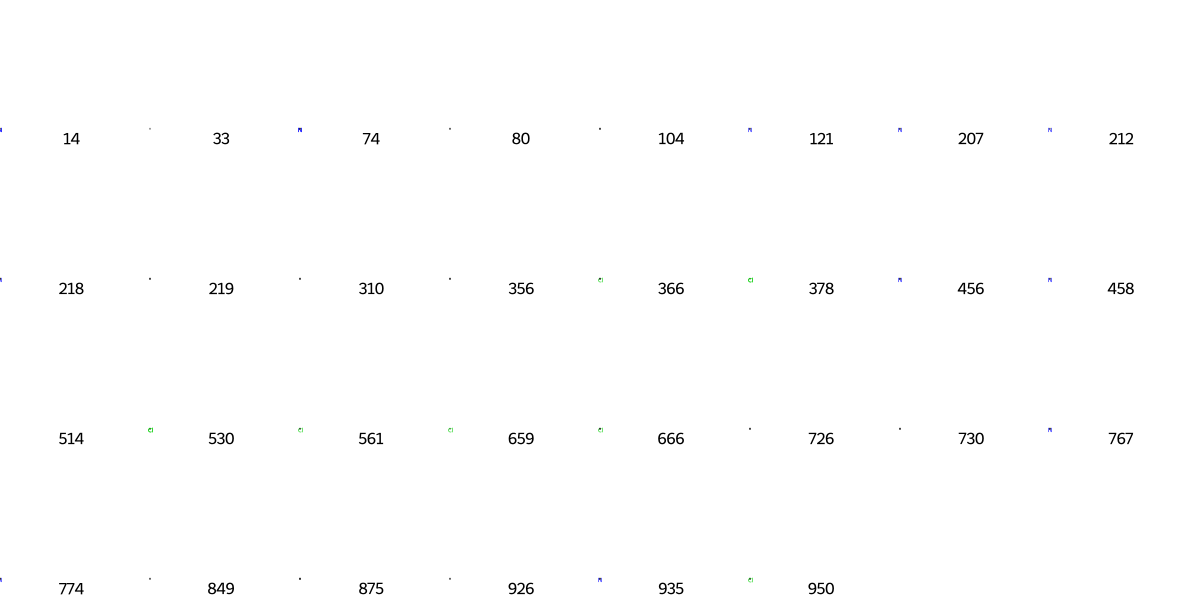

In [669]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [670]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[10,
 13,
 41,
 42,
 64,
 80,
 102,
 121,
 128,
 136,
 175,
 197,
 255,
 322,
 325,
 333,
 356,
 373,
 378,
 381,
 389,
 417,
 428,
 444,
 456,
 458,
 463,
 486,
 511,
 523,
 533,
 549,
 638,
 650,
 656,
 695,
 718,
 724,
 726,
 730,
 767,
 774,
 807,
 808,
 825,
 849,
 872,
 893,
 896,
 926,
 935,
 940,
 950,
 970]

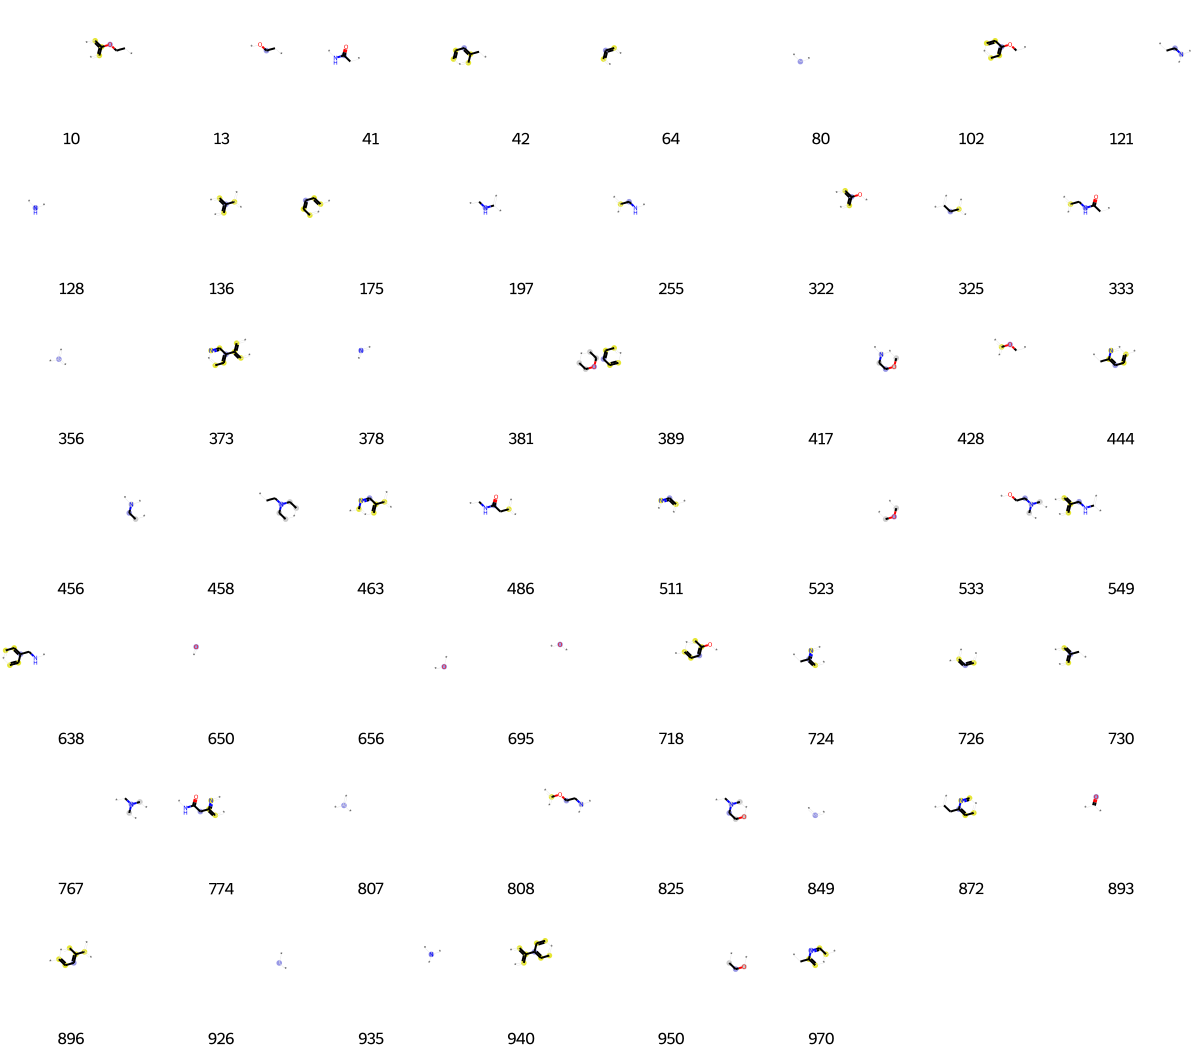

In [671]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [672]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[7,
 16,
 33,
 36,
 46,
 90,
 108,
 124,
 138,
 231,
 233,
 250,
 255,
 266,
 268,
 285,
 301,
 302,
 312,
 345,
 356,
 377,
 394,
 413,
 439,
 445,
 453,
 461,
 470,
 504,
 519,
 520,
 529,
 590,
 598,
 608,
 622,
 645,
 650,
 656,
 694,
 696,
 757,
 775,
 795,
 807,
 849,
 850,
 860,
 926,
 927,
 999,
 1009,
 1014,
 1019]

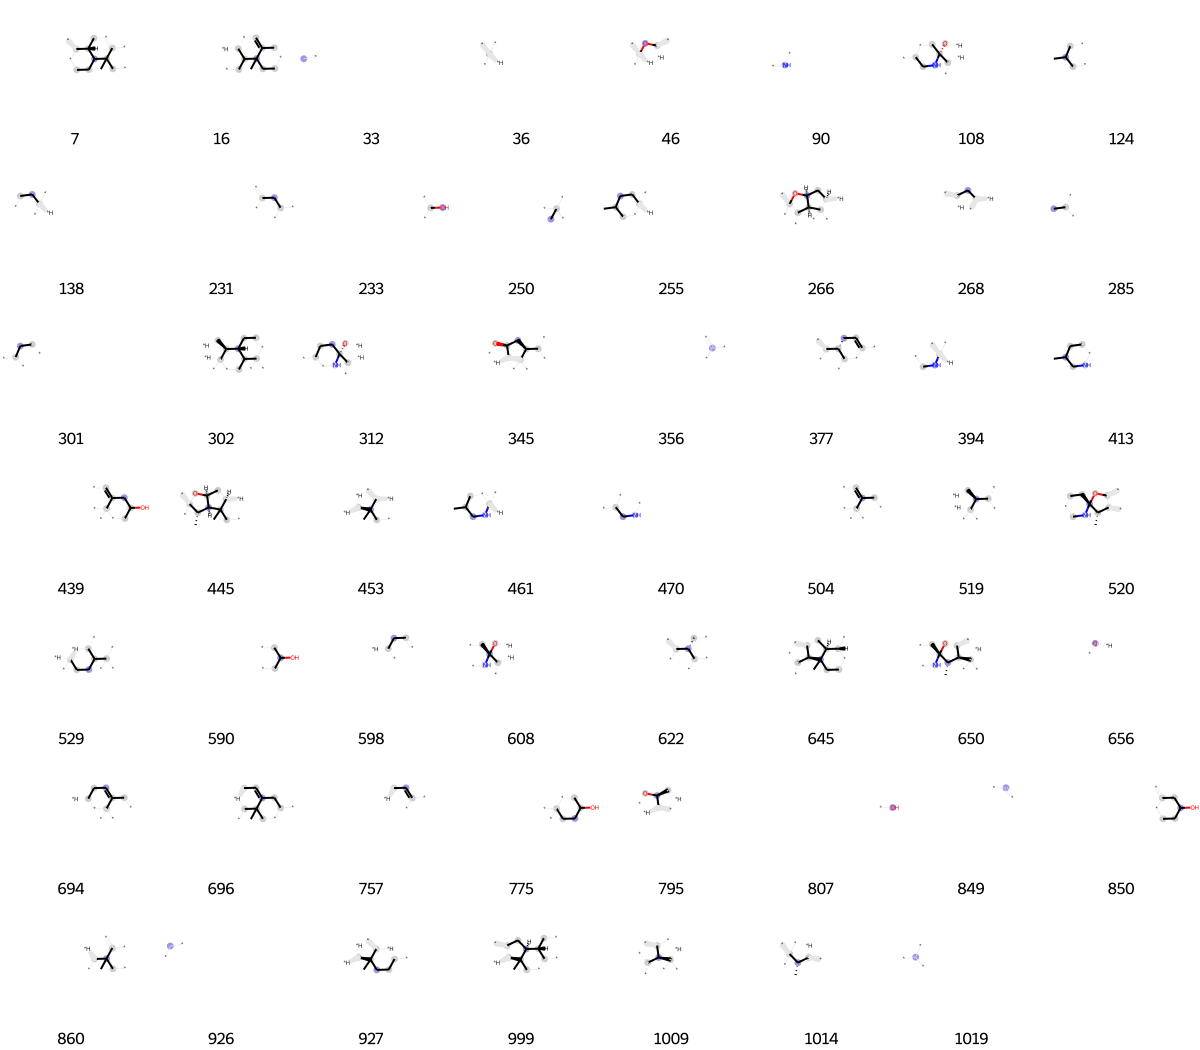

In [673]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [674]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 73,
 82,
 92,
 106,
 128,
 252,
 312,
 322,
 333,
 356,
 378,
 461,
 491,
 512,
 552,
 558,
 578,
 695,
 698,
 709,
 715,
 718,
 726,
 781,
 807,
 831,
 841,
 849,
 875,
 876,
 886,
 894,
 919,
 931,
 948,
 976,
 1019]

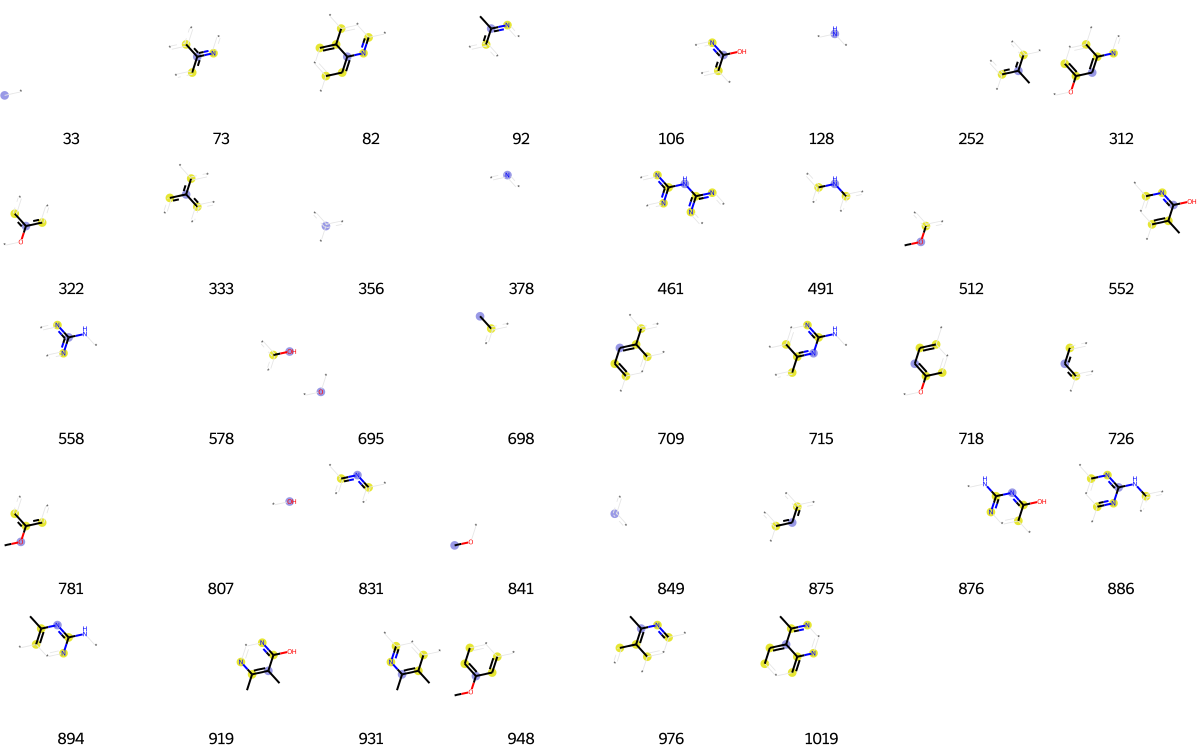

In [675]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [676]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[15,
 33,
 64,
 80,
 90,
 94,
 95,
 101,
 179,
 219,
 249,
 294,
 317,
 333,
 352,
 356,
 378,
 398,
 422,
 446,
 512,
 549,
 613,
 680,
 695,
 726,
 732,
 774,
 775,
 831,
 841,
 849,
 903,
 946,
 958,
 960]

In [677]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[80,
 104,
 144,
 147,
 193,
 219,
 310,
 315,
 356,
 451,
 578,
 583,
 589,
 726,
 730,
 807,
 816,
 849,
 875,
 937,
 981]

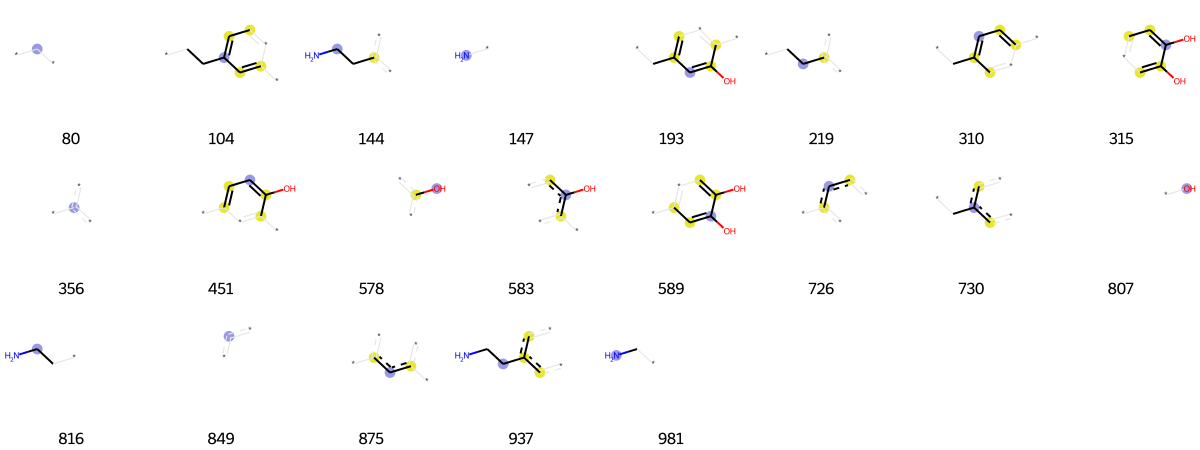

In [678]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [679]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[2,
 4,
 33,
 64,
 80,
 94,
 175,
 214,
 237,
 294,
 314,
 333,
 350,
 356,
 366,
 392,
 425,
 428,
 445,
 452,
 456,
 475,
 539,
 549,
 585,
 598,
 640,
 650,
 695,
 726,
 800,
 849,
 882,
 926,
 935,
 946,
 974]

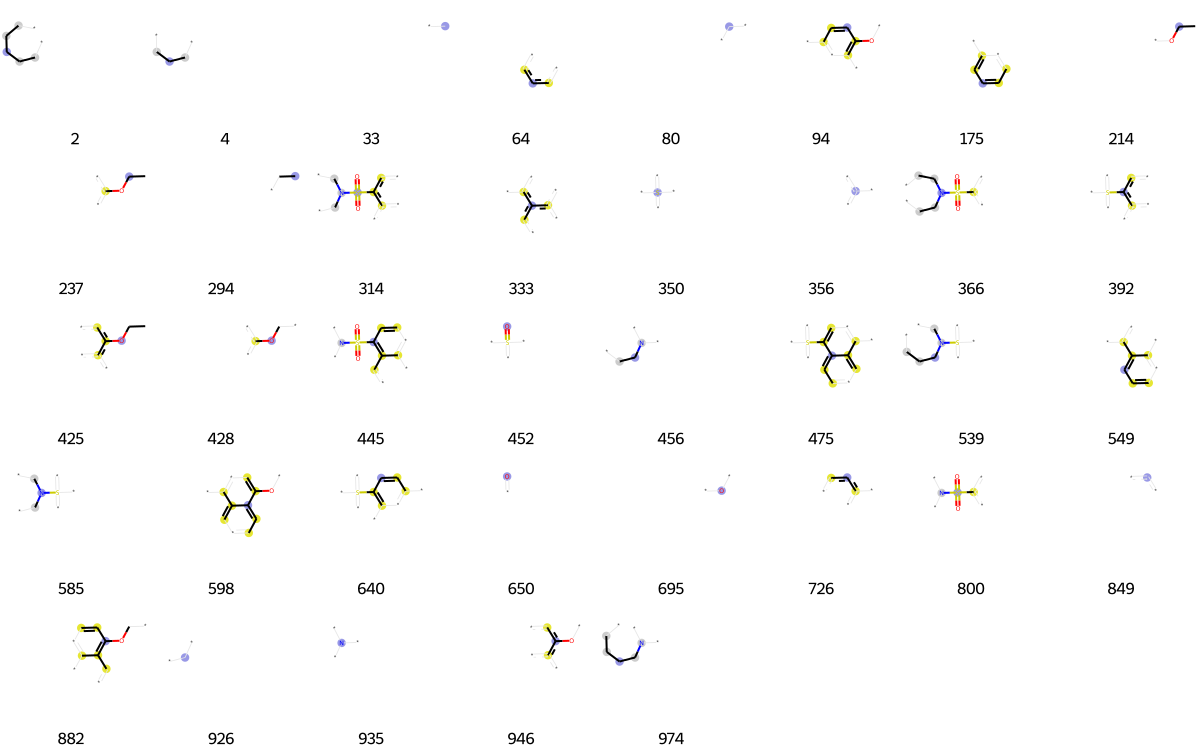

In [680]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])